
Grupo 6  
Enrique Ramos García, Ignacio Regidor Prieto, Guillermo Mármol Burgos y Diego Forteza Benito.  


In [ ]:
#Importación de las librerías a utilizar durante la práctica
import numpy as np
import keras
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

keras.__version__

'2.9.0'

#Practica 1

## Resumen
Esta práctica consiste en la creación de varios modelos de Redes de Neuronas Artificiales que sean capaces de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. Para entrenar a los modelos se utilizará el conjunto de datos **Fashion-MNIST**.

Esta base de datos contiene 70k imágenes de (28 x 28 píxeles) en escala de grises de prendas de ropa pertenecientes a la tienda de moda online Zalando.

El conjunto de todas las imágenes se puede clasificar en 10 clases (del 0 al 9) donde cada clase está asociada a un tipo de ropa distinta. 

La prenda a la que pertenece cada clase se muestra en la siguiente tabla:

| **CLASE** | **PRENDA** |
|-----------|------------|
| 0         | T-shirt    |
| 1         | Trouser    |
| 2         | Pullover   |
| 3         | Dress      |
| 4         | Coat       |
| 5         | Sandal     |
| 6         | Shirt      |
| 7         | Sneaker    |
| 8         | Bag        |
| 9         | Ankle boot |

##Introducción al Problema

Para realizar los modelos primero se debe cargar el conjunto de datos de Fashion-MNIST en keras. Para ello se utiliza la función `keras.datasets.fashion_mnist ` la cual como ya se ha mencionado contiene 70k de imágenes de las cuales se usarán 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con el objetivo de que la red aprende a clasificar las imágenes.  
Además, se define un vector class_names con los nombres de cada tipo de prenda ordenados como en la tabla.



In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
class_names = ["T-shirt",  "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

4422102/4422102 [==============================] - 0s 0us/step


Ahora comprobamos la naturaleza de los datos cargados. Ya sea la forma de estos, el número de datos, etc.


In [ ]:
print("Dimensión datos a entrenar",train_data.shape)
print("Dimensión etiquetas a entrenar",train_labels.shape)
print("Dimensión datos a evaluar",test_data.shape)
print("Dimensión etiquetas a evaluar",test_labels.shape)

Dimensión datos a entrenar (60000, 28, 28)
Dimensión etiquetas a entrenar (60000,)
Dimensión datos a evaluar (10000, 28, 28)
Dimensión etiquetas a evaluar (10000,)


Observamos que: 

*   `train_data` y `test_data` contienen 60.000 y 10.000 matrices de 28x28 cada una.
*   `train_labels` y `test_labels` contienen 60.000 y 10.000 etiquetas asociadas a su matriz perteneciente a los datos de entrenamiento.

###Verificación de los datos introducidos

Validamos que los datos se han cargado correctamente mostrando la matrices correspondientes a las imagenes 10.000 de `train_data` y 5.000 de `test_data ` y posteriormente sus correspondientes etiquetas asociadas.

In [ ]:
# Imagenes representadas como matrices 
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_data[10000]))
print(f'\n\n')
print(np.matrix(test_data[5000]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  55  89 161 117  74  92  60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9  19   0   0]
 [  0  77 143 239 231 175 117 139 157 218 212 173 120 174 206 146 163 154 170 150 127 158 201 224 198 132 113   0]
 [  0 142 147  79   0  84 223 135   0   0  33 144  89 202  51   0   0   0 142 179 205 115  94  62  28 141 113   0]
 [  0 152 210  43   0  57 223 151   0   0   0  62 123 192   0   3   0  76 109 10

Ahora veamos las imágenes en un plot binario (blanco-negro) para su mejor entendimiento ya que la representación en matriz con los valores no se diferencia bien.

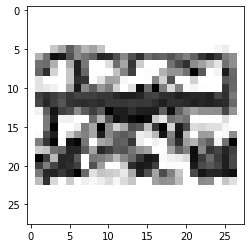

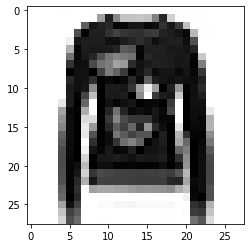

In [ ]:
# Imágenes pintadas con matplotlib
prenda = train_data[10000]
prenda2 = test_data[5000]
plt.imshow(prenda, cmap=plt.cm.binary)
plt.show()
plt.imshow(prenda2, cmap=plt.cm.binary)
plt.show()

Podemos observar que la primera imágen es un bolso mientras que la segunda es un jersey. Veamos los labels de estas.

In [ ]:
#Etiquetas de las imágenes
print(class_names[(train_labels[10000])])
print(class_names[(test_labels[5000])])

Bag
Pullover


Efectivamente, la primera es un bolso y la segunda un jersey.

###Preprocesamiento de los datos introducidos

Normalizamos los valores de las imágenes para optimizar y mejorar el funcionamiento de la red neuronal. Dividimos entre 255 ya que es el valor máximo posible de los bits de las imágenes. Además, ponemos 255.0 para asegurarnos que la división nos da un valor decimal (float) y no un entero (int).

In [ ]:
train_data = train_data/255.0
test_data = test_data/255.0
type(train_data[0,1,1])

numpy.float64

Ahora pasamos las etiquetas, almacenadas como los valores de los índices a one-hot-encoding con la funcion to_categorical 

In [ ]:
print(train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Acontinuación, como hemos mencionado que íbamos a hacer anteriormente, separamos 12K imágenes para la validación durante el entrenamiento de la red neuronal.

In [ ]:
x_val = train_data[:12000]
train_data_p = train_data[12000:]

y_val = train_labels[:12000]
train_labels_p = train_labels[12000:]

print(train_data_p.shape)
print(train_labels_p.shape)

print(x_val.shape)
print(y_val.shape)

(48000, 28, 28)
(48000, 10)
(12000, 28, 28)
(12000, 10)


###Funciones a utilizar durante la ejecución de las redes

Por último, definimos las funciones que vamos a utilizar para ver las predicciones de cada red neuronal

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'
  class_names = ["T-shirt",  "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

##Red Neuronal 1


| Neuronas en la 1º capa | Función de activación | Optimizador |
|------------------------|-----------------------|-------------|
| 10                     | relu               | sgd         |  

Definimos nuestro primer modelo de red neuronal el cual tendrá una capa densa con 10 neuronas, que tienen una función de activación relu. Además, tiene una capa de salida con 10 neuronas debido a que tenemos 10 diferentes tipos de prendas. Como es clasificación y queremos obtener probabilidades utilizaremos la función de activación softmax en la capa de salida. Por último, este modelo utiliza el optimizador sgd, métrica de precisión y la función de pérdida Categorical Crossentropy. Esto se puede hacer así ya que ya hemos pasado los labels a one-hot encoding. 

In [ ]:
#Arquitectura de la red:
modelo1 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(10, activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")
])
# Definimos Optimizador, Función de Perdida y Metrica:
modelo1.compile(optimizer = "sgd",
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics = ['accuracy'])
modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


En el resumen podemos observar la primera "capa" de flatten. Esta lo que hace es vectorizar la matriz de entrada linealizándola. Es decir concantena las filas de la matriz. Sabemos que las matrices son de 28x28 pixeles. No obstante si observamos la salida de esta capa podemos ver que es de 1x784, es decir un vector de 784 elementos. El resultado de multiplicar 28x28. Esto lo hacemos ya que es más óptimo meter los datos en vectores que en matrices. Podríamos realizarlo con una función fuera de la red neuronal. Sin embargo, esto nos simplifica tanto el trabajo como el código.  
La "segunda" capa, realmente la primera de la red neuronal, esta formada por 10 neuronas (por eso el outputshape de 10). Además, podemos observar que tiene un total de 7850 parámetros. Estos son los 7840 pesos y los umbrales de cada neurona (7840+10=7850). Recalcar que hay 7840 pesos ya que la capa es densa, es decir cada neurona esta conectada con cada uno de los puntos/valores de entrada (784 valores x 10 neuronas = 7840).  
Por último, la capa de salida, también densa, tiene 110 parámetros debido a que la salida de la anterior es un vector de 10 elementos. Entonces 10 valores x 10 neuronas = 100. Si a esto le sumamos los umbrales de cada una de las neuronas obtenemos ya 100+10=110.


In [ ]:
#Entrenamos la red:
history1 = modelo1.fit(train_data_p,
                     train_labels_p,
                     epochs = 5,
                     validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 14s 8ms/step - loss: 1.0407 - accuracy: 0.6588 - val_loss: 0.6874 - val_accuracy: 0.7787
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6113 - accuracy: 0.7948 - val_loss: 0.5644 - val_accuracy: 0.8122
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5379 - accuracy: 0.8167 - val_loss: 0.5147 - val_accuracy: 0.8262
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5022 - accuracy: 0.8266 - val_loss: 0.4868 - val_accuracy: 0.8341
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4786 - accuracy: 0.8335 - val_loss: 0.4732 - val_accuracy: 0.8365


Ahora graficamos la precisión y pérdida de entreno y de validación para observar el comportamiento de estas variables en función de el número de epochs con la que entrenamos la red neuronal. 

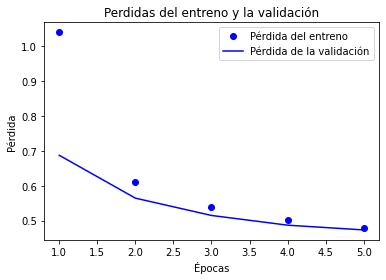

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs = range(1, len(loss1) + 1)

p1 = plt.plot(epochs, loss1, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss1, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

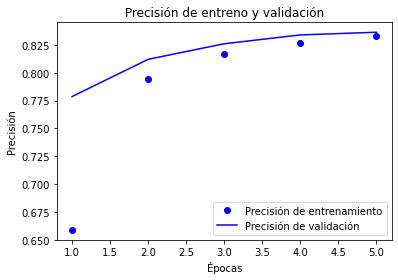

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

plt.plot(epochs, acc1, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc1, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

De las gráficas podríamos concluir que un numero más alto pero cercano a 5 epochs sería óptimo ya que las curvas no se llegan a cortar, es decir, no llegamos a sobreentrenamiento. Por ejemplo, en el caso de la gráfica de precisión, la precisión de los datos de validación sigue subiendo y se comporta de forma normal. Sin embargo, esto se debería de estudiar para tener una conclusión más acertada.

Ahora veamos la matriz de confusión para ver los aciertos y los errores. Además podremos ver en que prendas se equivoca y por cuales.

313/313 [==============================] - 1s 1ms/step
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


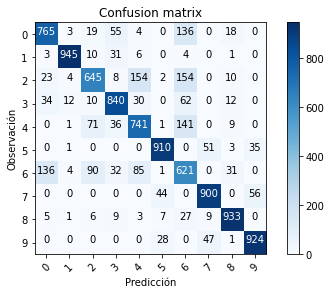

In [ ]:
Y_pred1 = modelo1.predict(test_data)
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes1 = np.argmax(Y_pred1, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes1)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true1 = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true1)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx1 = confusion_matrix(Y_true1, Y_pred_classes1) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx1, classes = range(10))

Podemos ver que  elemento más confundido es el 6, es decir la camisa. La confunde tanto al intentar clasificarla como al intentar clasificar otras prendas, clasificando estas como camisas. En concreto, esto sucede con los elementos 0, 2 y 4. Que corresponden a camisetas, jerseys y abrigos.

313/313 [==============================] - 0s 1ms/step
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


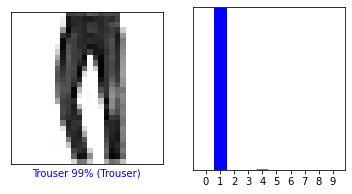

<Figure size 432x288 with 0 Axes>

In [ ]:
predicciones1 = modelo1.predict(test_data)
print(predicciones1[5])
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones1[i], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predicciones1[i],  test_labels)
plt.show()
plt.clf()

Podemos observar que el elemento 5 es un pantalón, al igual que lo que predice nuestra red neuronal con un 99% de probabilidad de que lo sea. Se puede concluir que la precisión para identificar una prenda tipo pantalón frente al resto de tipos de prendas es muy elevado.

Ahora se comprobará lo mismo con los primeros 10 primeros elementos:



====================EJEMPLO 1==========================================


[0.   0.   0.   0.   0.   0.19 0.   0.24 0.   0.57]


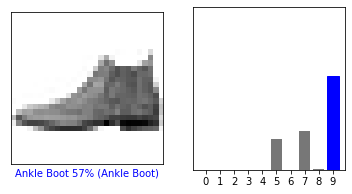



====================EJEMPLO 2==========================================


[0.   0.   0.83 0.   0.01 0.   0.16 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

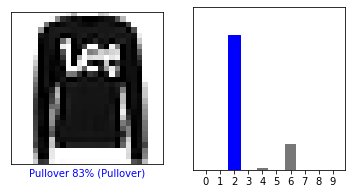



====================EJEMPLO 3==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

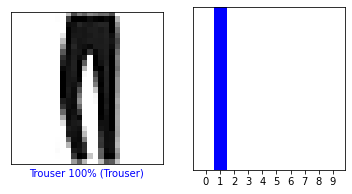



====================EJEMPLO 4==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

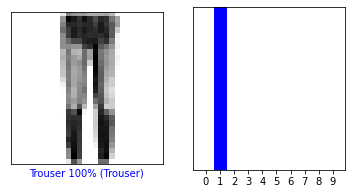



====================EJEMPLO 5==========================================


[0.11 0.   0.1  0.01 0.02 0.   0.75 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

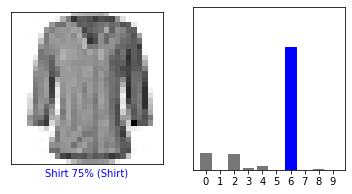



====================EJEMPLO 6==========================================


[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

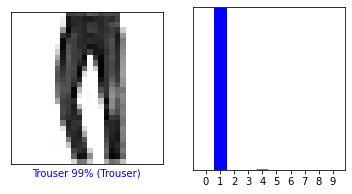



====================EJEMPLO 7==========================================


[0.01 0.   0.02 0.   0.83 0.   0.12 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

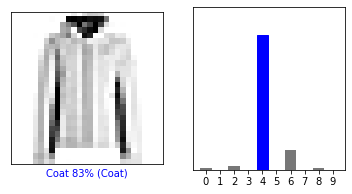



====================EJEMPLO 8==========================================


[0.   0.   0.03 0.   0.27 0.   0.69 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

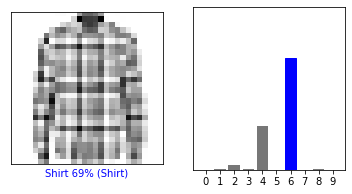



====================EJEMPLO 9==========================================


[0.01 0.03 0.01 0.02 0.   0.64 0.01 0.16 0.09 0.02]


<Figure size 432x288 with 0 Axes>

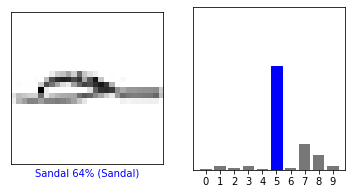



====================EJEMPLO 10==========================================


[0.   0.   0.   0.   0.   0.02 0.   0.98 0.   0.  ]


<Figure size 432x288 with 0 Axes>

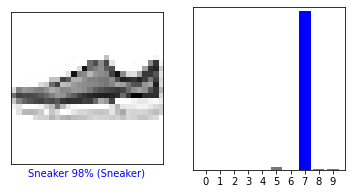

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  print("\n")
  print(f"====================EJEMPLO {i+1}==========================================")
  print("=======================================================================")
  print("\n")
  print(predicciones1[i])
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones1[i], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones1[i],  test_labels)
  plt.show()
  plt.clf()

Viendo las predicciones de nuestra red neuronal para los primeros 10 elementos podemos ver que, salvo las camisas, camisetas y jerseys, es capaz de predecir, con alta probabilidad en dicho elemento, cada prenda. No obstante, hemos de ver también que en estos casos la distribución de probabilidad de las sandalias y las botas esta más distribuida por lo que tampoco es capaz de diferenciarlas bien del todo (la probabilidad del elemento es alta pero no supone un % alto). Esto se debería estudiar más a fondo para ver si supone un error grande de acierto y si se puede mejorar dicho porcentaje. Una forma de mejora podría ser añadir más datos de entrenamiento de los grupos que fallan o aumentar el número de neuronas para aumentar los grados de libertad.

##Red Neuronal 2

| Neuronas en la 1º capa | Función de activación | Optimizador |
|------------------------|-----------------------|-------------|
| 10                     | relu               | rmsprop         |

Definimos nuestro segundo modelo de red neuronal el cual tendrá una capa densa con 10 neuronas, las cuales tienen una función de activación relu. Además, tiene una capa de salida con 10 neuronas debido a que tenemos 10 diferentes tipos de prendas. Como es clasificación y queremos obtener probabilidades utilizaremos la función de activación softmax en la capa de salida. Por último, este modelo utiliza el optimizador rmsprop, métrica de precisión y la función de pérdida Categorical Crossentropy. Esto se puede hacer así ya que ya hemos pasado los labels a one-hot encoding. 

In [ ]:
#Arquitectura de la red:
modelo2 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(10, activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")
])
# Definimos Optimizador, Función de Perdida y Metrica:
modelo2.compile(optimizer = "rmsprop",
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics = ['accuracy'])

modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


En el resumen podemos observar la primera "capa" de flatten. Esta lo que hace es vectorizar la matriz de entrada linealizándola. Es decir concantena las filas de la matriz. Sabemos que las matrices son de 28x28 pixeles. No obstante si observamos la salida de esta capa podemos ver que es de 1x784, es decir un vector de 784 elementos. El resultado de multiplicar 28x28. Esto lo hacemos ya que es más óptimo meter los datos en vectores que en matrices. Podríamos realizarlo con una función fuera de la red neuronal. Sin embargo, esto nos simplifica tanto el trabajo como el código.  
La "segunda" capa, realmente la primera de la red neuronal, esta formada por 10 neuronas (por eso el outputshape de 10). Además, podemos observar que tiene un total de 7850 parámetros. Estos son los 7840 pesos y los umbrales de cada neurona (7840+10=7850). Recalcar que hay 7840 pesos ya que la capa es densa, es decir cada neurona esta conectada con cada uno de los puntos/valores de entrada (784 valores x 10 neuronas = 7840).  
Por último, la capa de salida, también densa, tiene 110 parámetros debido a que la salida de la anterior es un vector de 10 elementos. Entonces 10 valores x 10 neuronas = 100. Si a esto le sumamos los umbrales de cada una de las neuronas obtenemos ya 100+10=110.


In [ ]:
#Entrenamos la red:
history2 = modelo2.fit(train_data_p,
                     train_labels_p,
                     epochs = 5,
                     validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6715 - accuracy: 0.7732 - val_loss: 0.5211 - val_accuracy: 0.8235
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4868 - accuracy: 0.8310 - val_loss: 0.4649 - val_accuracy: 0.8425
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4530 - accuracy: 0.8431 - val_loss: 0.4807 - val_accuracy: 0.8300
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4351 - accuracy: 0.8500 - val_loss: 0.4321 - val_accuracy: 0.8532
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4221 - accuracy: 0.8533 - val_loss: 0.4254 - val_accuracy: 0.8553


Ahora graficamos la precisión y pérdida de entreno y de validación para observar el comportamiento de estas variables en función de el número de epochs con la que entrenamos la red neuronal.

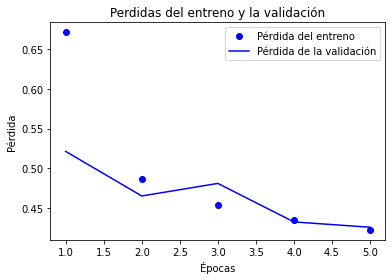

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(loss2) + 1)

plt.plot(epochs, loss2, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss2, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

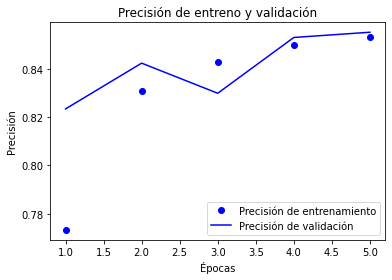

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

p2 = plt.plot(epochs, acc2, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc2, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

De las gráficas podríamos concluir que a partir de las 4 epochs se produce sobreentrenamiento. Sin embargo, no podríamos tomar esto como concluyente y deberíamos comprobar que en las siguientes epochs no suba la precisión de los datos de validación. Y es que, aunque de la 4ta a la 5ta epoch la precisión de los datos de validación disminuya, podemos ver que esto también sucede de la 2da a la 3ra. Es por eso que deberíamos probar con mas epochs para poder observar el comportamiento de las gráficas.

Ahora veamos la matriz de confusión:

313/313 [==============================] - 0s 1ms/step
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


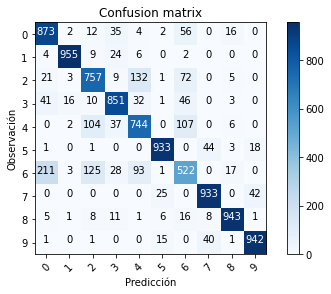

In [ ]:
Y_pred = modelo2.predict(test_data)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx2 = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx2, classes = range(10))

Al igual que la primera red neuronal, en esta red neuronal los grupos que más confunde son las sudaderas, las camisas y los abrigos. Es más, generalmente son confundidos por alguno de los mencionados. Esto nos indica que a la hora de diferenciar entre estos hay un porcentaje algo significante de que se confunda. Deberíamos tratar este problema más a fondo e intentar mejorar la precisión de estos elementos ya sea variando los hiperparámetros de la red neuronal, la distribución de datos (añadir más de estos grupos), etc. 

313/313 [==============================] - 0s 1ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


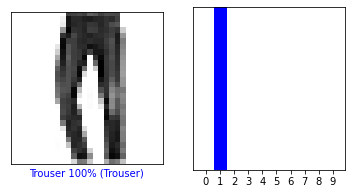

<Figure size 432x288 with 0 Axes>

In [ ]:
predicciones2 = modelo2.predict(test_data)
print(predicciones2[5])
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones2[i], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predicciones2[i],  test_labels)
plt.show()
plt.clf()

Para la predicción del elemento 5, el cual es un pantalón, nuestra red neuronal nos da una probabilidad de que la imágen sea un pantalón en un 99%. Esta probabilidad es bastante elevada lo que nos asegura que no debería confundirse en exceso al identificar prendas de tipo pantalon.

Por otra parte, veamos las predicciones de los primeros 10 elementos. 



====================EJEMPLO 1==========================================


[0.   0.   0.   0.   0.   0.1  0.   0.14 0.   0.75]


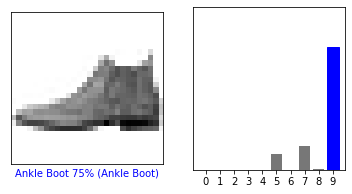



====================EJEMPLO 2==========================================


[0.01 0.   0.93 0.   0.   0.   0.06 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

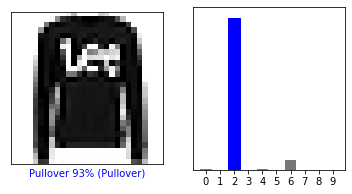



====================EJEMPLO 3==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

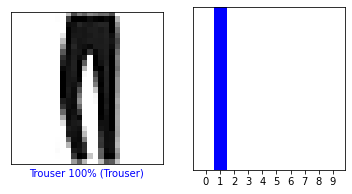



====================EJEMPLO 4==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

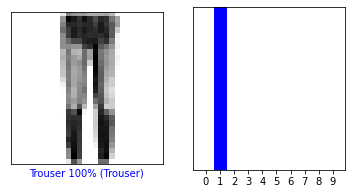



====================EJEMPLO 5==========================================


[0.23 0.   0.11 0.01 0.02 0.   0.63 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

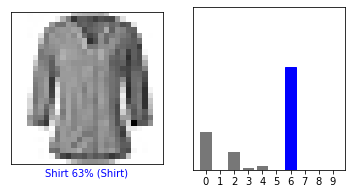



====================EJEMPLO 6==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

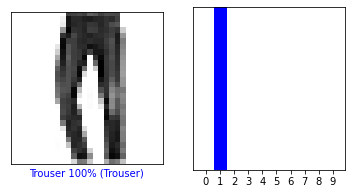



====================EJEMPLO 7==========================================


[0.01 0.   0.03 0.   0.77 0.   0.2  0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

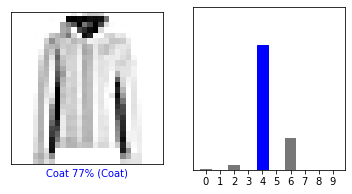



====================EJEMPLO 8==========================================


[0.01 0.   0.04 0.01 0.16 0.   0.79 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

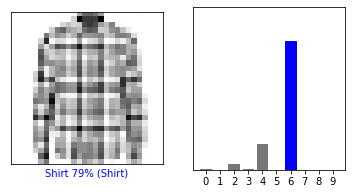



====================EJEMPLO 9==========================================


[0.   0.   0.01 0.01 0.01 0.85 0.01 0.09 0.02 0.  ]


<Figure size 432x288 with 0 Axes>

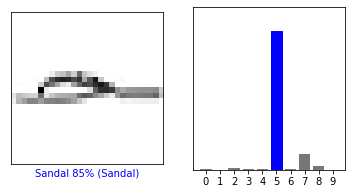



====================EJEMPLO 10==========================================


[0.   0.   0.   0.   0.   0.01 0.   0.99 0.   0.  ]


<Figure size 432x288 with 0 Axes>

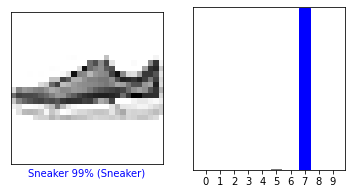

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  print("\n")
  print(f"====================EJEMPLO {i+1}==========================================")
  print("=======================================================================")
  print("\n")
  print(predicciones2[i])
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones2[i], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones2[i],  test_labels)
  plt.show()
  plt.clf()

Por otra parte, veamos las predicciones de los primeros 10 elementos. Para la mayoría es capaz de predecirlo con un 99% de porcentaje. Sin embargo, hay otros varios, como las camisas, camisetas y la sudaderas, las cuales siguen teniendo un porcentaje alto pero no las distingue de forma tan precisa como las demás.

##Red Neuronal 3

| Neuronas en la 1º capa | Función de activación | Optimizador |
|------------------------|-----------------------|-------------|
| 10                     | sigmoid               | sgd         |

Definimos nuestro tercer modelo de red neuronal el cual tendrá una capa densa con 10 neuronas, las cuales tienen una función de activación sigmoid. Además, tiene una capa de salida con 10 neuronas debido a que tenemos 10 diferentes tipos de prendas. Como es clasificación y queremos obtener probabilidades utilizaremos la función de activación softmax en la capa de salida. Por último, este modelo utiliza el optimizador sgd, métrica de precisión y la función de pérdida Categorical Crossentropy. Esto se puede hacer así ya que ya hemos pasado los labels a one-hot encoding. 

In [ ]:
#Arquitectura de la red:
modelo3 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(10, activation="sigmoid"),
                              tf.keras.layers.Dense(10, activation="softmax")
])
# Definimos Optimizador, Función de Perdida y Metrica:
modelo3.compile(optimizer = "sgd",
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics = ['accuracy'])
modelo3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


En el resumen podemos observar la primera "capa" de flatten. Esta lo que hace es vectorizar la matriz de entrada linealizándola. Es decir concantena las filas de la matriz. Sabemos que las matrices son de 28x28 pixeles. No obstante si observamos la salida de esta capa podemos ver que es de 1x784, es decir un vector de 784 elementos. El resultado de multiplicar 28x28. Esto lo hacemos ya que es más óptimo meter los datos en vectores que en matrices. Podríamos realizarlo con una función fuera de la red neuronal. Sin embargo, esto nos simplifica tanto el trabajo como el código.  
La "segunda" capa, realmente la primera de la red neuronal, esta formada por 10 neuronas (por eso el outputshape de 10). Además, podemos observar que tiene un total de 7850 parámetros. Estos son los 7840 pesos y los umbrales de cada neurona (7840+10=7850). Recalcar que hay 7840 pesos ya que la capa es densa, es decir cada neurona esta conectada con cada uno de los puntos/valores de entrada (784 valores x 10 neuronas = 7840).  
Por último, la capa de salida, también densa, tiene 110 parámetros debido a que la salida de la anterior es un vector de 10 elementos. Entonces 10 valores x 10 neuronas = 100. Si a esto le sumamos los umbrales de cada una de las neuronas obtenemos ya 100+10=110.


In [ ]:
#Entrenamos la red:
history3 = modelo3.fit(train_data_p,
                       train_labels_p,
                       epochs = 5,
                       validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.8613 - accuracy: 0.4639 - val_loss: 1.5156 - val_accuracy: 0.6112
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3215 - accuracy: 0.6280 - val_loss: 1.1653 - val_accuracy: 0.6377
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0723 - accuracy: 0.6525 - val_loss: 0.9931 - val_accuracy: 0.6644
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9428 - accuracy: 0.6763 - val_loss: 0.8956 - val_accuracy: 0.6933
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8632 - accuracy: 0.6971 - val_loss: 0.8310 - val_accuracy: 0.7058


Graficamos la precisión y pérdida de entreno y de validación para observar el comportamiento de estas variables en función de el número de epochs con la que entrenamos la red neuronal.

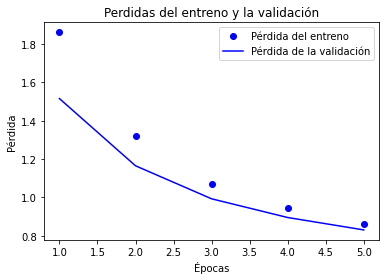

In [ ]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(loss3) + 1)

plt.plot(epochs, loss3, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss3, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

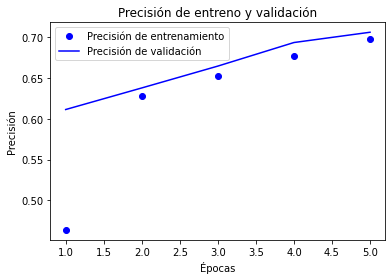

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

plt.plot(epochs, acc3, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc3, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

Se puede observar que se produce un ligero de sobreentrenamiento a partir de la 4º iteración. A la vez también se observa una carencia de precisión y un exceso de pérdida. Este modelo presenta uno de los peores rendimientos de los propuestos.

Ahora veamos la matriz de confusión:

313/313 [==============================] - 0s 1ms/step
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


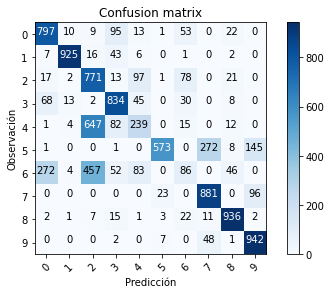

In [ ]:
Y_pred = modelo3.predict(test_data)
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

Podemos ver que, al igual que las dos redes neuronales anteriores, donde más fallos tiene es a la hora de predecir el elemento 6, las camisas, las cuales confunde con camisetas, abrigos y jerseys. No obstante, el porcentaje de precisión de esta modelo es menor y por eso podemos ver que ha acertado menos de un décimo de las imágenes de camisas.

313/313 [==============================] - 0s 1ms/step
[0.04 0.8  0.01 0.08 0.02 0.01 0.02 0.   0.   0.  ]


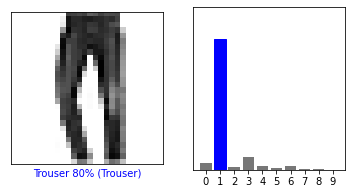

<Figure size 432x288 with 0 Axes>

In [ ]:
predicciones3 = modelo3.predict(test_data)
print(predicciones3[5])
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones3[i], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predicciones3[i],  test_labels)
plt.show()
plt.clf()

En este caso vemos que la Red Neuronal acierta en un 8X% que la prenda efectivamente es un pantalon y un 1X% de confusion ya que prevee que pudiesen ser otra prenda.



====================EJEMPLO 1==========================================


[0.   0.   0.   0.01 0.   0.28 0.01 0.17 0.05 0.48]


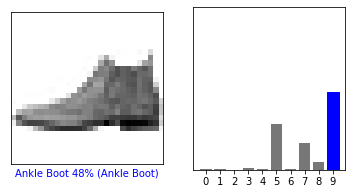



====================EJEMPLO 2==========================================


[0.02 0.   0.38 0.01 0.33 0.01 0.22 0.   0.02 0.  ]


<Figure size 432x288 with 0 Axes>

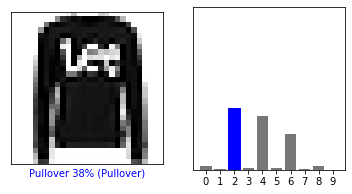



====================EJEMPLO 3==========================================


[0.01 0.89 0.   0.07 0.01 0.01 0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

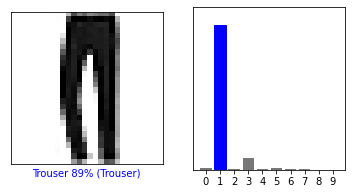



====================EJEMPLO 4==========================================


[0.01 0.88 0.   0.08 0.01 0.01 0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

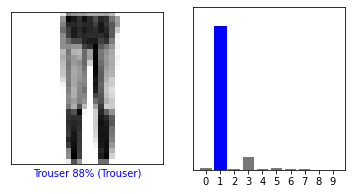



====================EJEMPLO 5==========================================


[0.19 0.01 0.18 0.04 0.17 0.01 0.34 0.01 0.05 0.01]


<Figure size 432x288 with 0 Axes>

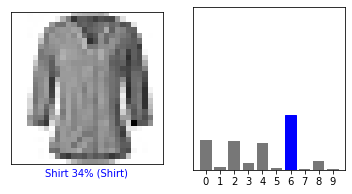



====================EJEMPLO 6==========================================


[0.04 0.8  0.01 0.08 0.02 0.01 0.02 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

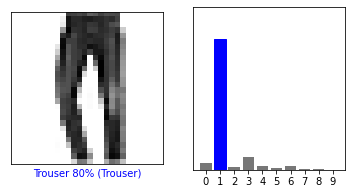



====================EJEMPLO 7==========================================


[0.09 0.03 0.29 0.02 0.3  0.01 0.24 0.   0.02 0.  ]


<Figure size 432x288 with 0 Axes>

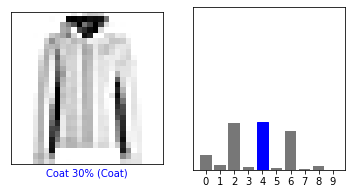



====================EJEMPLO 8==========================================


[0.03 0.01 0.36 0.01 0.31 0.02 0.22 0.   0.04 0.  ]


<Figure size 432x288 with 0 Axes>

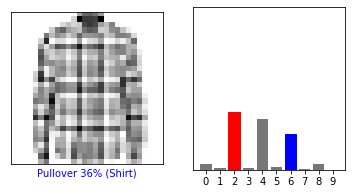



====================EJEMPLO 9==========================================


[0.02 0.03 0.03 0.06 0.04 0.26 0.04 0.44 0.05 0.03]


<Figure size 432x288 with 0 Axes>

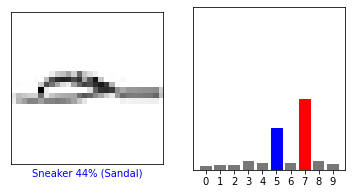



====================EJEMPLO 10==========================================


[0.   0.   0.   0.01 0.01 0.23 0.01 0.68 0.01 0.04]


<Figure size 432x288 with 0 Axes>

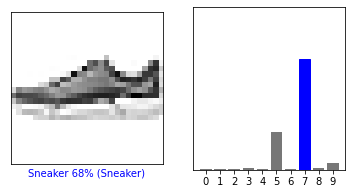

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  print("\n")
  print(f"====================EJEMPLO {i+1}==========================================")
  print("=======================================================================")
  print("\n")
  print(predicciones3[i])
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones3[i], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones3[i],  test_labels)
  plt.show()
  plt.clf()

Ahora, viendo las predicciones de nuestra red neuronal para los primeros 10 elementos podemos ver que, falla una gran cantidad de prendas. No obstante, vemos que los pantalones y los zapatos los sabe distinguir bien. La distribucion de probabilidad de aquellas prendas que falla es suave por lo que hay un gran nivel de confusion entre varias prendas. Esto se confirma con la matriz de confusion que tiene valores muy altos en esas prendas. Una forma de mejora podría ser añadir más datos de entrenamiento de los grupos que fallan o el número de neuronas para aumentar los grados de libertad.

##Red Neuronal 4

| Neuronas en la 1º capa | Función de activación | Optimizador |
|------------------------|-----------------------|-------------|
| 10                     | sigmoid               | rmsprop     |

Definimos nuestro cuarto modelo de red neuronal el cual tendrá una capa densa con 10 neuronas, las cuales tienen una función de activación sigmoid. Además, tiene una capa de salida con 10 neuronas debido a que tenemos 10 diferentes tipos de prendas. Como es clasificación y queremos obtener probabilidades utilizaremos la función de activación softmax en la capa de salida. Por último, este modelo utiliza el optimizador rmsprop, métrica de precisión y la función de pérdida Categorical Crossentropy. Esto se puede hacer así ya que ya hemos pasado los labels a one-hot encoding. 

In [ ]:
#Arquitectura de la red:
modelo4 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(10, activation="sigmoid"),
                              tf.keras.layers.Dense(10, activation="softmax")
])
# Definimos Optimizador, Función de Perdida y Metrica:
modelo4.compile(optimizer = "rmsprop",
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics = ['accuracy'])
modelo4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


En el resumen podemos observar la primera "capa" de flatten. Esta lo que hace es vectorizar la matriz de entrada linealizándola. Es decir concantena las filas de la matriz. Sabemos que las matrices son de 28x28 pixeles. No obstante si observamos la salida de esta capa podemos ver que es de 1x784, es decir un vector de 784 elementos. El resultado de multiplicar 28x28. Esto lo hacemos ya que es más óptimo meter los datos en vectores que en matrices. Podríamos realizarlo con una función fuera de la red neuronal. Sin embargo, esto nos simplifica tanto el trabajo como el código.  
La "segunda" capa, realmente la primera de la red neuronal, esta formada por 10 neuronas (por eso el outputshape de 10). Además, podemos observar que tiene un total de 7850 parámetros. Estos son los 7840 pesos y los umbrales de cada neurona (7840+10=7850). Recalcar que hay 7840 pesos ya que la capa es densa, es decir cada neurona esta conectada con cada uno de los puntos/valores de entrada (784 valores x 10 neuronas = 7840).  
Por último, la capa de salida, también densa, tiene 110 parámetros debido a que la salida de la anterior es un vector de 10 elementos. Entonces 10 valores x 10 neuronas = 100. Si a esto le sumamos los umbrales de cada una de las neuronas obtenemos ya 100+10=110.


In [ ]:
#Entrenamos la red:
history4 = modelo4.fit(train_data_p,
                       train_labels_p,
                       epochs = 5,
                       validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0453 - accuracy: 0.6827 - val_loss: 0.7136 - val_accuracy: 0.7683
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6153 - accuracy: 0.7952 - val_loss: 0.5574 - val_accuracy: 0.8153
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5117 - accuracy: 0.8280 - val_loss: 0.4974 - val_accuracy: 0.8311
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4685 - accuracy: 0.8385 - val_loss: 0.4638 - val_accuracy: 0.8388
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4452 - accuracy: 0.8453 - val_loss: 0.4540 - val_accuracy: 0.8416


Graficamos las pérdidas de entreno y de validación para observar el comportamiento de estas variables en función de el número de epochs con la que entrenamos la red neuronal.



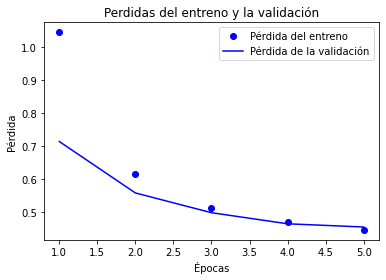

In [ ]:
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(1, len(loss4) + 1)

plt.plot(epochs, loss4, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss4, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

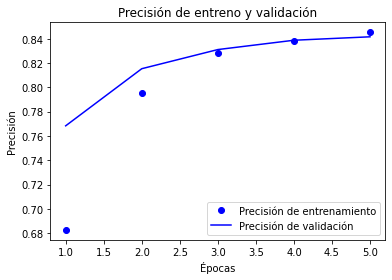

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']

plt.plot(epochs, acc4, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc4, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

En este caso podemos observar que la precisión de validación es mayor hasta la 4ta epoch debido que en la 5ta ya es mayor la precisión con los datos de entrenamiento. No obstante, podríamos probar con más epochs para ver el comportamiento de ambas funciones y así determinar si se produce sobreentrenamiento o no; ya que no solo el corte de las gráficas es el determinante de sobreentrenamiento.

313/313 [==============================] - 1s 1ms/step
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


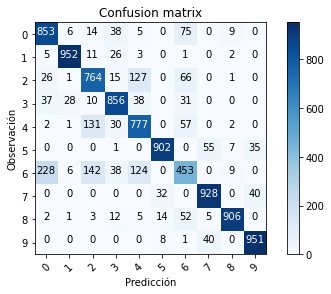

In [ ]:
Y_pred = modelo4.predict(test_data)
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

En la matriz de confusion vemos que hay ciertos elementos que no distingue correctamente, en concreto el que menos acierta es el elemento 6. Sucede lo mismo que en las demás redes neuronales. Este modelo no es capaz de diferenciar camisas de jerseys, abrigos y camisetas. Vemos que esto es un problema recurrente y que debería ser tratado en un trabajo futuro.

313/313 [==============================] - 1s 2ms/step
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


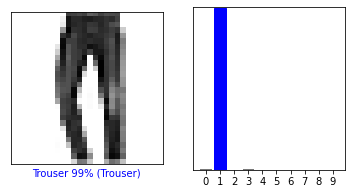

<Figure size 432x288 with 0 Axes>

In [ ]:
predicciones4 = modelo4.predict(test_data)
print(predicciones4[5])
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones4[i], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predicciones4[i],  test_labels)
plt.show()
plt.clf()

En este caso vemos que la Red Neuronal acierta en un 9X% que la prenda efectivamente es un pantalon y un 0.X% de confusion. Es un porcentaje bastante alto por lo que es aceptable. Sin embargo, un elemento no es concluyente por lo que observemos los 10 primeros:



====================EJEMPLO 1==========================================


[0.   0.   0.   0.01 0.   0.09 0.   0.15 0.   0.75]


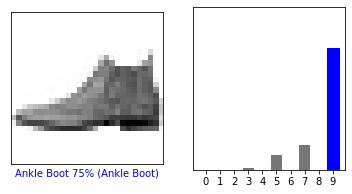



====================EJEMPLO 2==========================================


[0.01 0.   0.91 0.   0.02 0.   0.06 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

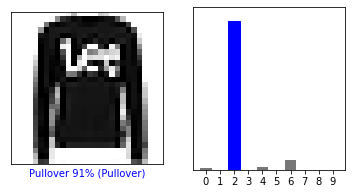



====================EJEMPLO 3==========================================


[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

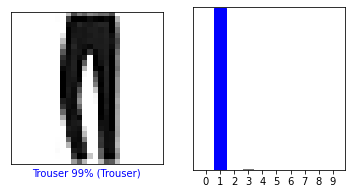



====================EJEMPLO 4==========================================


[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

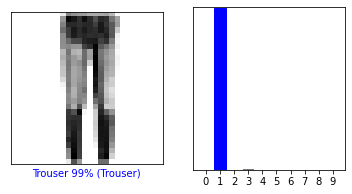



====================EJEMPLO 5==========================================


[0.44 0.   0.15 0.   0.01 0.01 0.39 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

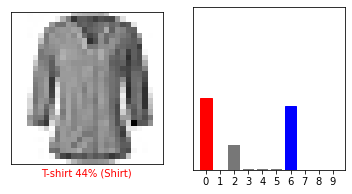



====================EJEMPLO 6==========================================


[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

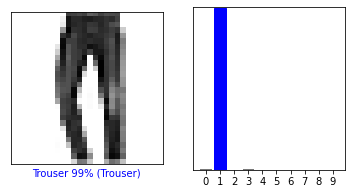



====================EJEMPLO 7==========================================


[0.   0.   0.09 0.   0.82 0.   0.08 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

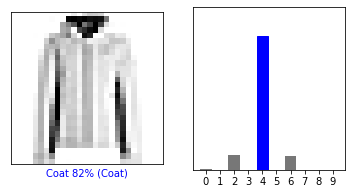



====================EJEMPLO 8==========================================


[0.01 0.   0.06 0.   0.16 0.   0.74 0.   0.03 0.  ]


<Figure size 432x288 with 0 Axes>

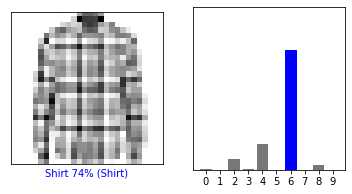



====================EJEMPLO 9==========================================


[0.   0.   0.   0.01 0.   0.87 0.   0.09 0.01 0.  ]


<Figure size 432x288 with 0 Axes>

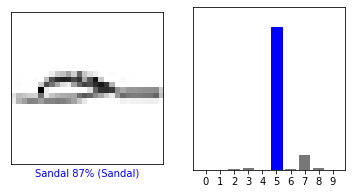



====================EJEMPLO 10==========================================


[0.   0.   0.   0.   0.   0.01 0.   0.99 0.   0.  ]


<Figure size 432x288 with 0 Axes>

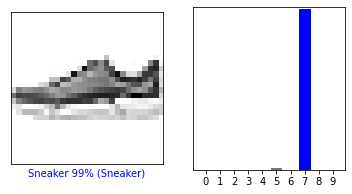

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  print("\n")
  print(f"====================EJEMPLO {i+1}==========================================")
  print("=======================================================================")
  print("\n")
  print(predicciones4[i])
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones4[i], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones4[i],  test_labels)
  plt.show()
  plt.clf()

En este caso consigue acerarlas todas. En su gran mayoria acierta todas las prendas con mas de un 75%; salvo la camisa (nos confirma lo visto en la matriz de confusión) y la bota. Una forma de mejorar este error seria aumentar la cantidad de imagenes de camisas y botas en la fase de entrenamiento para que aprenda a distinguir las prendas mejor o intentar descifrar porque se produce este error. Por ejemplo, a lo mejor, aumentando la calidad de las imágenes introducidas.

##Red Neuronal 5

| Neuronas en la 1º capa | Función de activación | Optimizador |
|------------------------|-----------------------|-------------|
| 512                    | relu                  | sgd         |

Definimos nuestro quinto modelo de red neuronal el cual tendrá una capa densa con 512 neuronas, las cuales tienen una función de activación relu. Además, tiene una capa de salida con 10 neuronas debido a que tenemos 10 diferentes tipos de prendas. Como es clasificación y queremos obtener probabilidades utilizaremos la función de activación softmax en la capa de salida. Por último, este modelo utiliza el optimizador sgd, métrica de precisión y la función de pérdida Categorical Crossentropy. Esto se puede hacer así ya que ya hemos pasado los labels a one-hot encoding. 

In [ ]:
#Arquitectura de la red:
modelo5 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(512, activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")
])
# Definimos Optimizador, Función de Perdida y Metrica:
modelo5.compile(optimizer = "sgd",
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics = ['accuracy'])

modelo5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Usamos la capa flatten como en todas las otras redes para vectorizar la matriz de entrada linealizándola. En el resumen del Modelo 5, podemos observar que la primera capa de la red neuronal esta formada por 512 neuronas (por eso el outputshape de 512). Además, podemos observar que tiene un total de 401920 parámetros. Estos son los 401408 pesos (512 neuronas x 784, que hace referencia al vector de la matriz de entrada linealizada) y los umbrales de cada neurona (784*512+512=401920). Hay 401408 pesos ya que la capa es densa.
Por último, la capa de salida, también densa, tiene 5130 parámetros debido a que la salida de la anterior es un vector de 512 elementos. Entonces 512 valores x 10 neuronas = 100. Si a esto le sumamos los umbrales de cada una de las 10 neuronas obtenemos 5130.

In [ ]:
#Entrenamos la red:
history5 = modelo5.fit(train_data_p,
                       train_labels_p,
                       epochs = 5,
                       validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7456 - accuracy: 0.7662 - val_loss: 0.5678 - val_accuracy: 0.8075
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5181 - accuracy: 0.8249 - val_loss: 0.4996 - val_accuracy: 0.8342
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4720 - accuracy: 0.8388 - val_loss: 0.4695 - val_accuracy: 0.8406
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4453 - accuracy: 0.8469 - val_loss: 0.4283 - val_accuracy: 0.8558
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4272 - accuracy: 0.8535 - val_loss: 0.4171 - val_accuracy: 0.8587


Graficamos las pérdidas de entreno y de validación para observar el comportamiento de estas variables en función de el número de epochs con la que entrenamos la red neuronal.

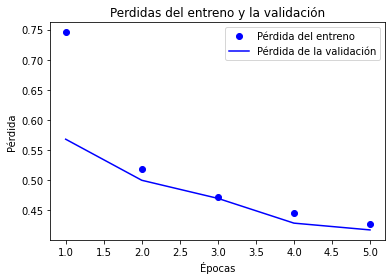

In [ ]:
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs = range(1, len(loss5) + 1)

plt.plot(epochs, loss5, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss5, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

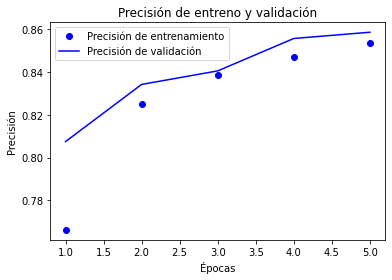

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']

plt.plot(epochs, acc5, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc5, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

En este caso si nos fijamos en la grafica por epocas vemos que es optimo en 4 ya que es donde corta y no llegriamos al sobreentrenamiento (como pasaria con 5 epocas). En el caso de la vadilacion vemos un punto de cruce en la 4 epoca y vemos que la precison es ascendiente pero pasada la 4 epoca puede descender.

313/313 [==============================] - 1s 3ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


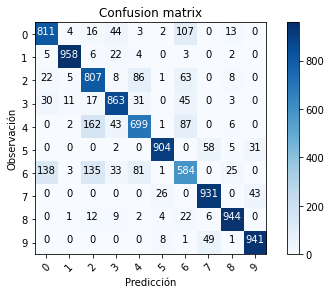

In [ ]:
Y_pred = modelo5.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

En la matriz de confusion vemos que hay ciertos elementos que no distingue correctamente pero al no ser confusiones drasticas podemos dar la red como valida. Es interesante resaltar que las camisas, camisetas y abrigos se confunden entre si. La mayor ocurriencia ocurre con las camisas con jerseys, camisetas y abrigos; aunque es menor para las camisteas dada su aucencia de mangas.

313/313 [==============================] - 1s 3ms/step
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


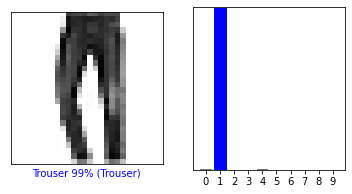

<Figure size 432x288 with 0 Axes>

In [ ]:
predicciones5 = modelo5.predict(test_data)
print(predicciones5[5])
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones5[i], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predicciones5[i],  test_labels)
plt.show()
plt.clf()

En este caso vemos que la Red Neuronal con 512 neuronas en la primera capa, funcion de activacion relu y optimizador sdg acierta en un 9X% que la prenda efectivamente es un pantalon. Vemos ademas que hay una confusion minima ya que prevee que pudiesen ser o una camiseta o una blusa o una falda.



====================EJEMPLO 1==========================================


[0.   0.   0.   0.   0.   0.11 0.   0.28 0.   0.6 ]


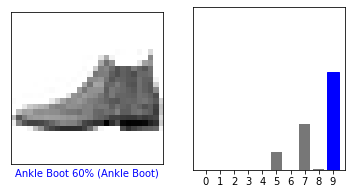



====================EJEMPLO 2==========================================


[0.   0.   0.98 0.   0.   0.   0.02 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

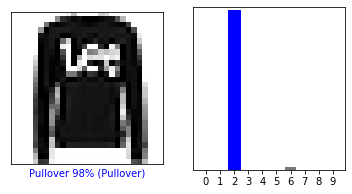



====================EJEMPLO 3==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

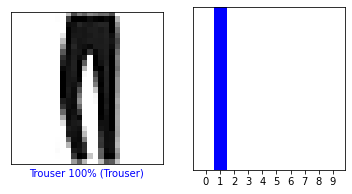



====================EJEMPLO 4==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

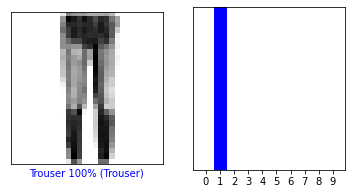



====================EJEMPLO 5==========================================


[0.21 0.   0.16 0.02 0.02 0.   0.57 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

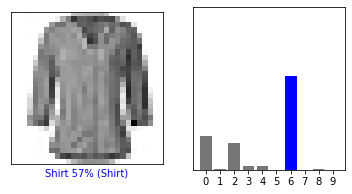



====================EJEMPLO 6==========================================


[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

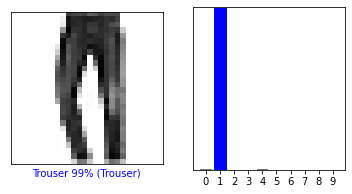



====================EJEMPLO 7==========================================


[0.04 0.   0.04 0.   0.73 0.   0.17 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

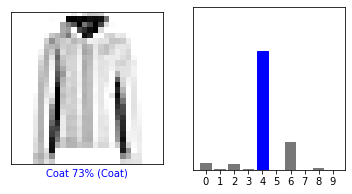



====================EJEMPLO 8==========================================


[0.   0.   0.02 0.   0.1  0.   0.86 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

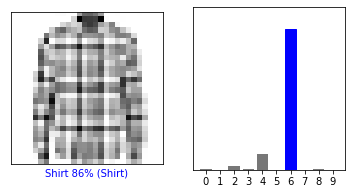



====================EJEMPLO 9==========================================


[0.01 0.01 0.02 0.02 0.   0.75 0.02 0.14 0.03 0.  ]


<Figure size 432x288 with 0 Axes>

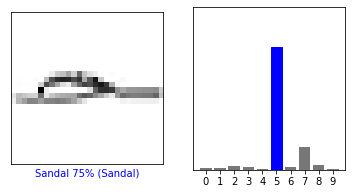



====================EJEMPLO 10==========================================


[0.   0.   0.   0.   0.   0.01 0.   0.98 0.   0.  ]


<Figure size 432x288 with 0 Axes>

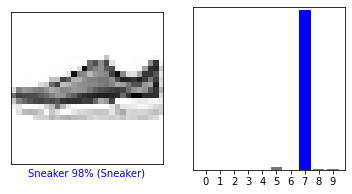

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  print("\n")
  print(f"====================EJEMPLO {i+1}==========================================")
  print("=======================================================================")
  print("\n")
  print(predicciones5[i])
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones5[i], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones5[i],  test_labels)
  plt.show()
  plt.clf()

En el caso en el que vemos las 10 primeras imagenes del conjunto test consigue acerarlas todas. En su gran mayoria acierta todas las prendas con mas de un 75%. Por el otro lado vemos que confunde prendas como camisas con camisteas o zapatos con sandalias lo que intuituvamente tiene sentido porque son objetos parecidos en forma lo que crea confusion a la red. Una forma de mejorar este error seria aumentar la cantidad de imagenes de sandalias y zapatos en la fase de entrenamiento para que aprenda a distinguir las prendas mejor.

##Red Neuronal 6

| Neuronas en la 1º capa | Función de activación | Optimizador |
|------------------------|-----------------------|-------------|
| 512                    | relu                  | rmsprop     |

Definimos nuestro sexto modelo de red neuronal el cual tendrá una capa densa con 512 neuronas, las cuales tienen una función de activación relu. Además, tiene una capa de salida con 10 neuronas debido a que tenemos 10 diferentes tipos de prendas. Como es clasificación y queremos obtener probabilidades utilizaremos la función de activación softmax en la capa de salida. Por último, este modelo utiliza el optimizador rmsprop, métrica de precisión y la función de pérdida Categorical Crossentropy. Esto se puede hacer así ya que ya hemos pasado los labels a one-hot encoding. 

In [ ]:
#Arquitectura de la red:
modelo6 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(512, activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")
])
# Definimos Optimizador, Función de Perdida y Metrica:
modelo6.compile(optimizer = "rmsprop",
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics = ['accuracy'])

modelo6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


En el resumen podemos observar la primera "capa" de flatten. Esta lo que hace es vectorizar la matriz de entrada linealizándola. Es decir concantena las filas de la matriz. Sabemos que las matrices son de 28x28 pixeles. No obstante si observamos la salida de esta capa podemos ver que es de 1x784, es decir un vector de 784 elementos. El resultado de multiplicar 28x28. Esto lo hacemos ya que es más óptimo meter los datos en vectores que en matrices. Podríamos realizarlo con una función fuera de la red neuronal. Sin embargo, esto nos simplifica tanto el trabajo como el código.  
La "segunda" capa, realmente la primera de la red neuronal, esta formada por 512 neuronas (por eso el outputshape de 512). Además, podemos observar que tiene un total de 401920 parámetros. Estos son los 401408 pesos y los umbrales de cada neurona (401408+512=7850). Recalcar que hay 401408 pesos ya que la capa es densa, es decir cada neurona esta conectada con cada uno de los puntos/valores de entrada (784 valores x 512 neuronas = 401408).  
Por último, la capa de salida, también densa, tiene 5130 parámetros debido a que la salida de la anterior es un vector de 512 elementos. Entonces 512 valores x 10 neuronas = 5120. Si a esto le sumamos los umbrales de cada una de las neuronas obtenemos ya 5120+10=5130.


In [ ]:
#Entrenamos la red:
history6 = modelo6.fit(train_data_p,
                       train_labels_p,
                       epochs = 5,
                       validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 0.5113 - accuracy: 0.8171 - val_loss: 0.4149 - val_accuracy: 0.8556
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3894 - accuracy: 0.8622 - val_loss: 0.3716 - val_accuracy: 0.8722
Epoch 3/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3593 - accuracy: 0.8735 - val_loss: 0.3514 - val_accuracy: 0.8800
Epoch 4/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3432 - accuracy: 0.8804 - val_loss: 0.3797 - val_accuracy: 0.8689
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3319 - accuracy: 0.8855 - val_loss: 0.3785 - val_accuracy: 0.8783


Graficamos las pérdidas de entreno y de validación para observar el comportamiento de estas variables en función de el número de epochs con la que entrenamos la red neuronal.

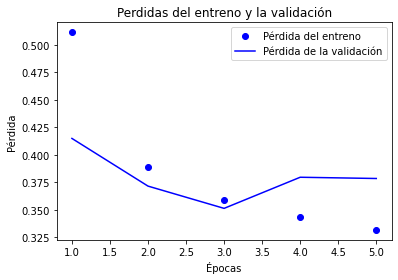

In [ ]:
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs = range(1, len(loss6) + 1)

plt.plot(epochs, loss6, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss6, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

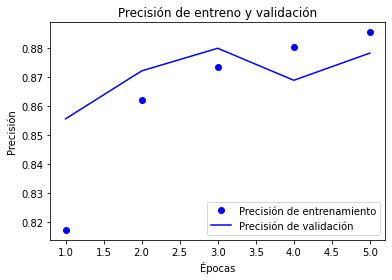

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc6 = history6.history['accuracy']
val_acc6 = history6.history['val_accuracy']

plt.plot(epochs, acc6, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc6, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

En este caso si nos fijamos en la grafica por epocas vemos que es optimo en 3 ya que es donde corta y no llegariamos al sobreentrenamiento. En el caso de la vadilacion vemos un punto de cruce poco antes de la 3 epoca. No obstante, no estaría de más, como hemos dicho anteriormente, aumentar el número de epochs para así tener una conclusión más acertada. Esto se debe a que, por ejemplo, a lo mejor la precisión de los datos de validación siguen subiendo a pesar de haber cortado las gráficas.

313/313 [==============================] - 1s 3ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


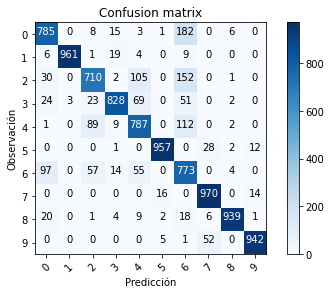

In [ ]:
Y_pred = modelo6.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

En la matriz de confusion vemos que, como viene pasando en los anteriores modelos,  el elemento que mas confunde son la scamisas confundiendola po rcamisetas, abrigos y sudaderas. Es interesante ver como este error se propaga a todos los modelos a paser de su precisión. Nosotros creemos que esto se puede deber a que estas prendas son muy parecidas y debido a la baja calidad de la imágen la red no es capaz de determinar rasgos claros que diferencien dichas prendas.

313/313 [==============================] - 1s 3ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


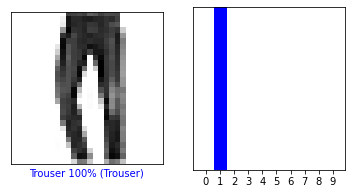

<Figure size 432x288 with 0 Axes>

In [ ]:
predicciones6 = modelo6.predict(test_data)
print(predicciones6[5])
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones6[i], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predicciones6[i],  test_labels)
plt.show()
plt.clf()

En este caso vemos que la Red Neuronal con 512 neuronas en la primera capa, funcion de activacion relu y optimizador sdg acierta en un 100% aprox. que la prenda efectivamente es un pantalon. Vemos ademas que hay una confusion minima ya que prevee que pudiesen ser o una camiseta o una blusa o una falda (depende de la ejecución).



====================EJEMPLO 1==========================================


[0.   0.   0.   0.   0.   0.   0.   0.07 0.   0.93]


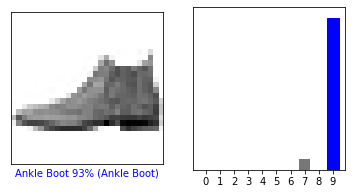



====================EJEMPLO 2==========================================


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

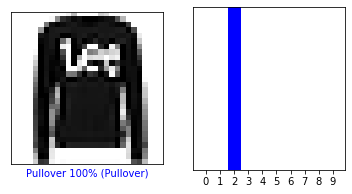



====================EJEMPLO 3==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

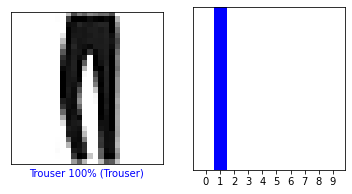



====================EJEMPLO 4==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

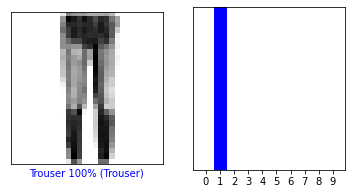



====================EJEMPLO 5==========================================


[0.09 0.   0.01 0.   0.   0.   0.9  0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

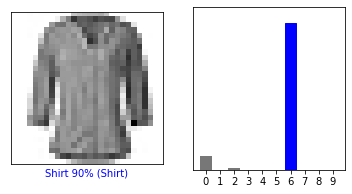



====================EJEMPLO 6==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

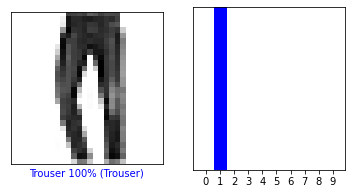



====================EJEMPLO 7==========================================


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

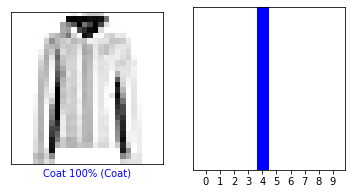



====================EJEMPLO 8==========================================


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

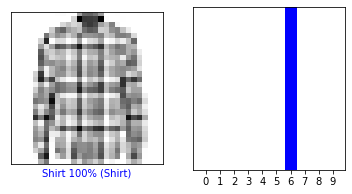



====================EJEMPLO 9==========================================


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

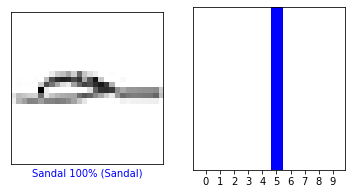



====================EJEMPLO 10==========================================


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


<Figure size 432x288 with 0 Axes>

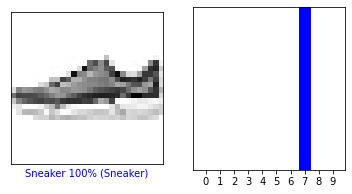

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  print("\n")
  print(f"====================EJEMPLO {i+1}==========================================")
  print("=======================================================================")
  print("\n")
  print(predicciones6[i])
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones6[i], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones6[i],  test_labels)
  plt.show()
  plt.clf()

En este caso vemos que ocurre algo muy interesante. Acierta 9/10 imágenes al 100% y la decima la falla. Si vemos la matriz de confusion tiene sentido que esto ocurra porque vemos que la red no diferencia las camisetas de las camisas. Una forma de mejorar este error seria aumentar la cantidad de imagenes de camisetas y camisas en la fase de entrenamiento para que aprenda a distinguir las prendas mejor.

##Red Neuronal 7

| Neuronas en la 1º capa | Función de activación | Optimizador |
|------------------------|-----------------------|-------------|
| 512                    | sigmoid               | sgd         |

Definimos nuestro séptimo modelo de red neuronal el cual tendrá una capa densa con 512 neuronas, las cuales tienen una función de activación sigmoid. Además, tiene una capa de salida con 10 neuronas debido a que tenemos 10 diferentes tipos de prendas. Como es clasificación y queremos obtener probabilidades utilizaremos la función de activación softmax en la capa de salida. Por último, este modelo utiliza el optimizador sgd, métrica de precisión y la función de pérdida Categorical Crossentropy. Esto se puede hacer así ya que ya hemos pasado los labels a one-hot encoding. 

In [ ]:
#Arquitectura de la red:
modelo7 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(512, activation="sigmoid"),
                              tf.keras.layers.Dense(10, activation="softmax")
])
# Definimos Optimizador, Función de Perdida y Metrica:
modelo7.compile(optimizer = "sgd",
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics = ['accuracy'])

modelo7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenamos la red:
history7 = modelo7.fit(train_data_p,
                       train_labels_p,
                       epochs = 5,
                       validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 1.2361 - accuracy: 0.6609 - val_loss: 0.8594 - val_accuracy: 0.7258
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7596 - accuracy: 0.7509 - val_loss: 0.6929 - val_accuracy: 0.7676
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6594 - accuracy: 0.7741 - val_loss: 0.6271 - val_accuracy: 0.7853
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6087 - accuracy: 0.7893 - val_loss: 0.5903 - val_accuracy: 0.7987
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5751 - accuracy: 0.8008 - val_loss: 0.5619 - val_accuracy: 0.8056


Graficamos las pérdida y precisión de entreno y de validación para observar el comportamiento de estas variables en función de el número de epochs con la que entrenamos la red neuronal.

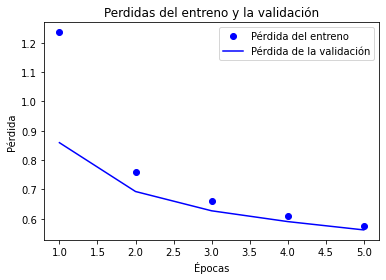

In [ ]:
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']

epochs = range(1, len(loss7) + 1)

plt.plot(epochs, loss7, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss7, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

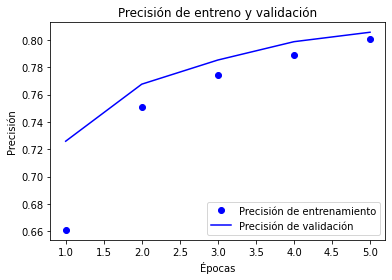

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc7 = history7.history['accuracy']
val_acc7 = history7.history['val_accuracy']

plt.plot(epochs, acc7, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc7, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

En este caso, podríamos concluir que un numero más alto pero cercano a 5 epochs sería óptimo ya que las curvas no se llegan a cortar, es decir, no llegamos a sobreentrenamiento. Sin embargo, esto se debería de estudiar para tener una conclusión más acertada.

313/313 [==============================] - 1s 3ms/step
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


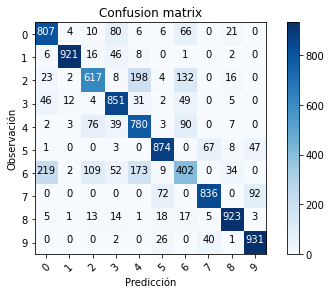

In [ ]:
Y_pred = modelo7.predict(test_data)
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se sigue observando el patrón de falta de precisión en las prendas superiores, especialmente camisas.

313/313 [==============================] - 1s 3ms/step
[0.01 0.97 0.   0.01 0.02 0.   0.   0.   0.   0.  ]


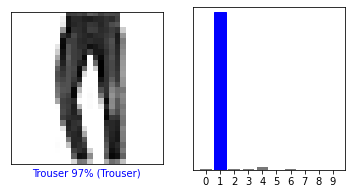

<Figure size 432x288 with 0 Axes>

In [ ]:
predicciones7 = modelo7.predict(test_data)
print(predicciones7[5])
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones7[i], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predicciones7[i],  test_labels)
plt.show()
plt.clf()



====================EJEMPLO 1==========================================


[0.   0.   0.   0.   0.   0.27 0.   0.24 0.03 0.46]


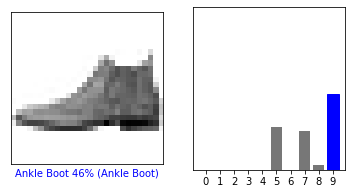



====================EJEMPLO 2==========================================


[0.   0.   0.87 0.   0.04 0.   0.09 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

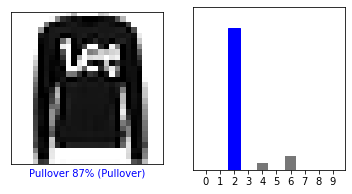



====================EJEMPLO 3==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

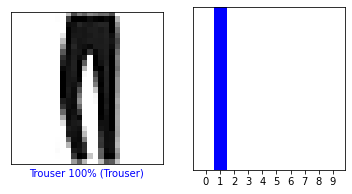



====================EJEMPLO 4==========================================


[0.   0.99 0.   0.01 0.   0.   0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

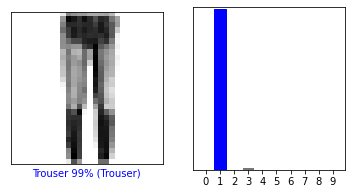



====================EJEMPLO 5==========================================


[0.19 0.   0.18 0.03 0.04 0.   0.55 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

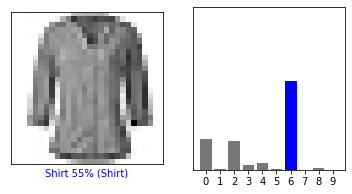



====================EJEMPLO 6==========================================


[0.01 0.97 0.   0.01 0.02 0.   0.   0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

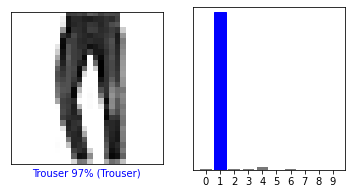



====================EJEMPLO 7==========================================


[0.12 0.01 0.08 0.01 0.49 0.01 0.26 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

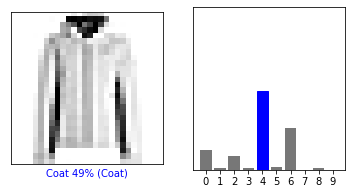



====================EJEMPLO 8==========================================


[0.01 0.   0.11 0.01 0.29 0.   0.55 0.   0.01 0.  ]


<Figure size 432x288 with 0 Axes>

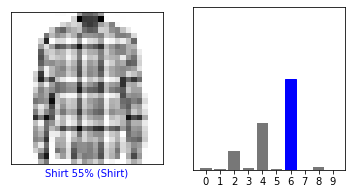



====================EJEMPLO 9==========================================


[0.02 0.01 0.02 0.03 0.01 0.58 0.04 0.23 0.04 0.  ]


<Figure size 432x288 with 0 Axes>

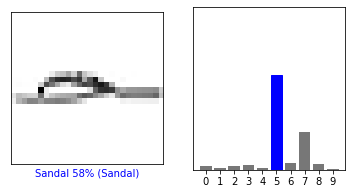



====================EJEMPLO 10==========================================


[0.   0.   0.   0.   0.   0.09 0.   0.89 0.01 0.  ]


<Figure size 432x288 with 0 Axes>

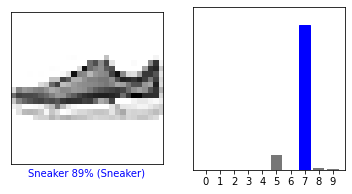

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  print("\n")
  print(f"====================EJEMPLO {i+1}==========================================")
  print("=======================================================================")
  print("\n")
  print(predicciones7[i])
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones7[i], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones7[i],  test_labels)
  plt.show()
  plt.clf()

Se puede observar que el modelo 7 tiene dificultades principalmente para distinguir entre topos de calzados, es decir, zapatillas, botas y sandalias.
Además, también le cuesta un poco diferenciar algunas prendas superiores como camisas y abrigos.
Por otro lado, distingue bastante bien otras prendas como pantalones, jerseys.

##Red Neuronal 8

| Neuronas en la 1º capa | Función de activación | Optimizador |
|------------------------|-----------------------|-------------|
| 512                    | sigmoid               | rmsprop     |


Definimos nuestro octavo modelo de red neuronal el cual tendrá una capa densa con 512 neuronas, las cuales tienen una función de activación sigmoid. Además, tiene una capa de salida con 10 neuronas debido a que tenemos 10 diferentes tipos de prendas. Como es clasificación y queremos obtener probabilidades utilizaremos la función de activación softmax en la capa de salida. Por último, este modelo utiliza el optimizador rmsprop, métrica de precisión y la función de pérdida Categorical Crossentropy. Esto se puede hacer así ya que ya hemos pasado los labels a one-hot encoding. 

In [ ]:
#Arquitectura de la red:
modelo8 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(512, activation="sigmoid"),
                              tf.keras.layers.Dense(10, activation="softmax")
])
# Definimos Optimizador, Función de Perdida y Metrica:
modelo8.compile(optimizer = "rmsprop",
               loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics = ['accuracy'])

modelo8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenamos la red:
history8 = modelo8.fit(train_data_p,
                       train_labels_p,
                       epochs = 5,
                       validation_data = (x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5314 - accuracy: 0.8083 - val_loss: 0.5149 - val_accuracy: 0.8140
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3988 - accuracy: 0.8542 - val_loss: 0.3792 - val_accuracy: 0.8612
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3564 - accuracy: 0.8712 - val_loss: 0.3972 - val_accuracy: 0.8603
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3314 - accuracy: 0.8794 - val_loss: 0.3553 - val_accuracy: 0.8700
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3130 - accuracy: 0.8854 - val_loss: 0.3486 - val_accuracy: 0.8742


Graficamos las pérdida y precisión de entreno y de validación para observar el comportamiento de estas variables en función de el número de epochs con la que entrenamos la red neuronal.

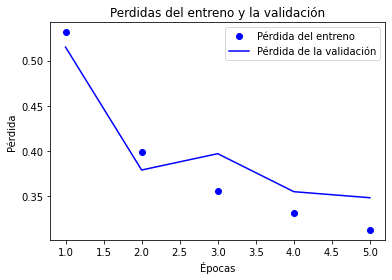

In [ ]:
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']

epochs = range(1, len(loss8) + 1)

plt.plot(epochs, loss8, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss8, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

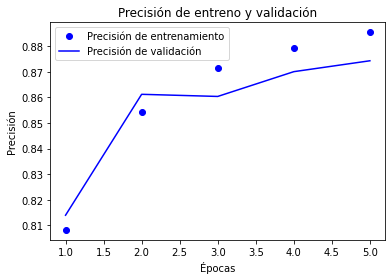

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc8 = history8.history['accuracy']
val_acc8 = history8.history['val_accuracy']

plt.plot(epochs, acc8, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc8, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

En este caso, si nos fijamos en las gráficas observamos que el número óptimo de épocas es 3 ya que es donde cortan las curvas y no llegariamos al sobreentrenamiento. Aquí, también sería recomendable aumentar el número de epochs para así tener una conclusión más acertada. 

313/313 [==============================] - 1s 3ms/step
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


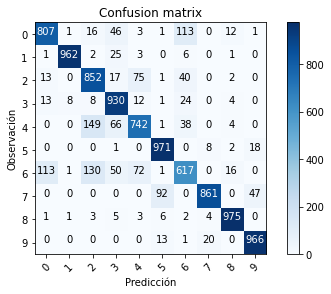

In [ ]:
Y_pred = modelo8.predict(test_data)
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx8 = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx8, classes = range(10))

Se sigue observando el patrón de falta de precisión en las prendas superiores, especialmente camisas.

313/313 [==============================] - 1s 3ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


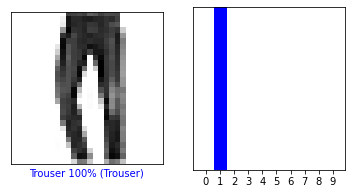

<Figure size 432x288 with 0 Axes>

In [ ]:
predicciones8 = modelo8.predict(test_data)
print(predicciones8[5])
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones8[i], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predicciones8[i],  test_labels)
plt.show()
plt.clf()



====================EJEMPLO 1==========================================


[0.   0.   0.   0.   0.   0.05 0.   0.01 0.   0.94]


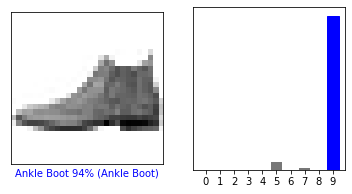



====================EJEMPLO 2==========================================


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

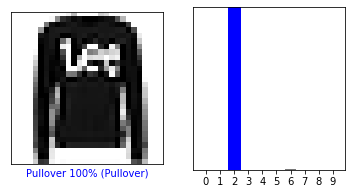



====================EJEMPLO 3==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

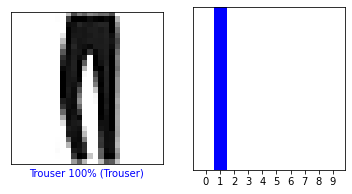



====================EJEMPLO 4==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

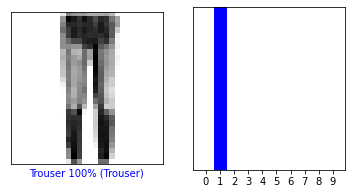



====================EJEMPLO 5==========================================


[0.12 0.   0.07 0.   0.   0.   0.8  0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

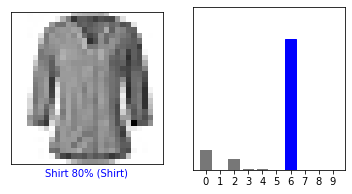



====================EJEMPLO 6==========================================


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

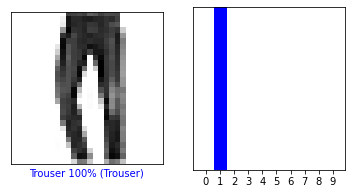



====================EJEMPLO 7==========================================


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

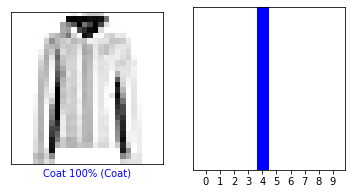



====================EJEMPLO 8==========================================


[0.   0.   0.   0.   0.01 0.   0.99 0.   0.   0.  ]


<Figure size 432x288 with 0 Axes>

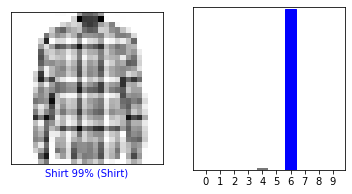



====================EJEMPLO 9==========================================


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

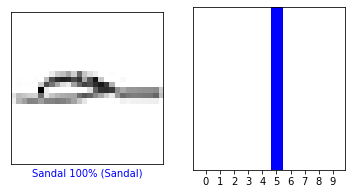



====================EJEMPLO 10==========================================


[0.   0.   0.   0.   0.   0.03 0.   0.97 0.   0.  ]


<Figure size 432x288 with 0 Axes>

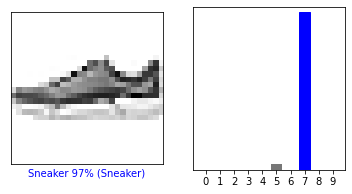

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  print("\n")
  print(f"====================EJEMPLO {i+1}==========================================")
  print("=======================================================================")
  print("\n")
  print(predicciones8[i])
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones8[i], test_labels, test_data.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones8[i],  test_labels)
  plt.show()
  plt.clf()

Observamos que este modelo cuenta con una gran precisión para distinguir las distintas prendas, excepto por las camisetas en las que tiene solo un 65% de precisión.

##Cuestiones

### Cuestión 1 y 2: 


1.   Implementación de 8 distintos modelos de redes neuronales.
2.   Explicar la salida de la llamada ` model.summary() ` de cada uno de los 8 casos

Parámetros fijos: 


*   Función de pérdida: `categorical_crossentropy`
*   métrica de precisión 
*   epochs: 5

Realizadas durante la memoria

###Cuestión 3
Analizar e interpretar los resultados de las redes 2 y 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25)

In [ ]:
#Entrenamos la red 2 cambiando las epochas a 25:
history2_1 = modelo2.fit(train_data_p,
                     train_labels_p,
                     epochs = 25,
                     validation_data = (x_val, y_val))

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4141 - accuracy: 0.8559 - val_loss: 0.4151 - val_accuracy: 0.8593
Epoch 2/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4056 - accuracy: 0.8583 - val_loss: 0.4356 - val_accuracy: 0.8517
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4001 - accuracy: 0.8606 - val_loss: 0.4419 - val_accuracy: 0.8493
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3944 - accuracy: 0.8621 - val_loss: 0.4143 - val_accuracy: 0.8600
Epoch 5/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3903 - accuracy: 0.8633 - val_loss: 0.4111 - val_accuracy: 0.8583
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3865 - accuracy: 0.8647 - val_loss: 0.4412 - val_accuracy: 0.8472
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8665 - val_loss: 0.4212 - val_accuracy:

In [ ]:
#Entrenamos la red 7 cambiando las epochs a 25:
history7_1 = modelo7.fit(train_data_p,
                       train_labels_p,
                       epochs = 25,
                       validation_data = (x_val, y_val))

Epoch 1/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5512 - accuracy: 0.8079 - val_loss: 0.5408 - val_accuracy: 0.8131
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5327 - accuracy: 0.8144 - val_loss: 0.5246 - val_accuracy: 0.8194
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5185 - accuracy: 0.8188 - val_loss: 0.5099 - val_accuracy: 0.8250
Epoch 4/25
1342/1500 [=========================>....] - ETA: 1s - loss: 0.5074 - accuracy: 0.8230

KeyboardInterrupt: ignored

In [ ]:
#Modelo 2
#Loss
loss2_1 = history2_1.history['loss']
val_loss2_1 = history2_1.history['val_loss']
#Accuracy
acc2_1 = history2_1.history['accuracy']
val_acc2_1 = history2_1.history['val_accuracy']

epochs = range(1, len(acc2_1) + 1)

#Modelo 7
#Loss
loss7_1 = history7_1.history['loss']
val_loss7_1 = history7_1.history['val_loss']
#Accuracy
acc7_1 = history7_1.history['accuracy']
val_acc7_1 = history7_1.history['val_accuracy']
epochs = range(1, len(acc7_1) + 1)

In [ ]:

size = (10,6)
plt.subplot(121)
plt.plot(epochs, loss2_1, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss2_1, 'b', label='Pérdida de Validación')
plt.title('Modelo 2_1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.subplot(122)
plt.plot(epochs, loss7_1, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss7_1, 'b', label='Pérdida de Validación')
plt.title('Modelo 7_1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.suptitle('Pérdidas de entreno y validación')


plt.show()

Observamos que con los datos de entrenamiento las funciones de pérdida son muy similares, sin embargo, con los datos de validación claramente el modelo 2 funciona mucho peor que el modelo 7. Se observa que en el modelo 2 hay una divergencia entre la pérdida de entrenamiento y validación bastante alta y , sin embargo, en el modelo 7 las pérdidas entre el modelo y la validación son similares.

A parte podemos observar como se produce sobreajuste en el modelo 2 a partir de la 3º iteración (algo que ya habíamos obsevado antes con 5 epochs con este modelo).

In [ ]:
size = (10,6)
plt.subplot(121)
plt.plot(epochs, acc2_1, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_acc2_1, 'b', label='Pérdida de Validación')
plt.title('Modelo 2_1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.subplot(122)
plt.plot(epochs, acc7_1, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_acc7_1, 'b', label='Pérdida de Validación')
plt.title('Modelo 7_1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.suptitle('Precisión de entreno y validación')


plt.show()

Con la precisión ocurre prácticamente lo mismo que con la pérdida y es que vemos como con los datos de entrenamiento el rendimiento de los modelos es muy parecido pero con los datos de validación vuelve a ser el modelo 7 el que presenta mayor precisión que el modelo 2. A parte, volvemos a poder observar como la precisión que muestra el modelo 7 con los datos de entrenamiento y con los de validación vuelve a ser idéntico lo que nos quiere decir que es este modelo el que es capaz de generalizar mejor nueva información.

###Cuestión 4
Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en 
el conjunto de datos de prueba

In [ ]:
# Verificamos el modelo 1 contra el conjunto de pruebas
test_loss1, test_acc1 = modelo1.evaluate(test_data, test_labels)

In [ ]:
# Verificamos el modelo 2 contra el conjunto de pruebas
test_loss2, test_acc2 = modelo2.evaluate(test_data, test_labels)

In [ ]:
# Verificamos el modelo 3 contra el conjunto de pruebas
test_loss3, test_acc3 = modelo3.evaluate(test_data, test_labels)

In [ ]:
# Verificamos el modelo 4 contra el conjunto de pruebas
test_loss4, test_acc4 = modelo4.evaluate(test_data, test_labels)

In [ ]:
# Verificamos el modelo 5 contra el conjunto de pruebas
test_loss5, test_acc5 = modelo5.evaluate(test_data, test_labels)

In [ ]:
# Verificamos el modelo 6 contra el conjunto de pruebas
test_loss6, test_acc6 = modelo6.evaluate(test_data, test_labels)

In [ ]:
# Verificamos el modelo 7 contra el conjunto de pruebas
test_loss7, test_acc7 = modelo7.evaluate(test_data, test_labels)

In [ ]:
# Verificamos el modelo 8 contra el conjunto de pruebas
test_loss8, test_acc8 = modelo8.evaluate(test_data, test_labels)

Para comparar los 8 modelos imprimimos una tabla con la pérdida y la precisión estimada de cada uno y los ordenamos en función de estos. 

Para la ordenación en función de la pérdida los ordenamos de menor a mayor ya que cuanto menor sea esta menor serán las distancias entre los valores reales y los predecidos y mayor rendimiento ofrecerá el modelo, sin embargo, en función de la precisión es lo opuesto y, por tanto, ordenamos los modelos de mayor a menor.

In [ ]:
data = {'Caso':['Caso1', 'Caso2', 'Caso3', 'Caso4', 'Caso5', 'Caso6', 'Caso7', 'Caso8'],
        'Loss': [test_loss1, test_loss2, test_loss3, test_loss4, test_loss5, test_loss6, test_loss7, test_loss8],
        'Accuracy':[test_acc1, test_acc2, test_acc3, test_acc4, test_acc5, test_acc6, test_acc7, test_acc8]}
  
df = pd.DataFrame(data)
print(df)

In [ ]:
#Ordenación en función de la pérdida
df_loss = df.sort_values(by = 'Loss', ascending = True)
print(df_loss)

Observamos que son de nuevo los modelos 8 y 6 los que ofrecen una menor pérdida con los datos de test. Además también vemos como los modelos con gran número de neuronas en la primera capa tienen menor pérdida que los modelos con menor número de neuronas en la 1º capa lo que nos hace concluir que el número de neuronas está influyendo a la hora de minimizar la pérdida. Por contra los modelos 1 y 3 son los que están ofreciendo una mayor pérdida que el resto. Además se hace muy notable la pérdida que ofrece el modelo 3 frente al resto de modelos siendo su pérdida bastante más elevada que la que le precede, en este caso, la del modelo 1.

In [ ]:
#Ordenación en función de la precisión
df_acc = df.sort_values(by = 'Accuracy', ascending = False)
print(df_acc)

En cuanto a la precisión los modelos con mayor `accuracy` vuelven a ser los modelos 8 y 6 y se vuelve a observar que son los modelos con mayor número de neuronas en la 1º capa los que ofrecen mayor precisión que los modelos con menor número de neuronas en la 1º capa. Además vuelven a ser los modelos 1 y en su mayoría 3 los que vuelven a ofrecer una peor precisión que el resto de modelos. 

###Cuestion 5
Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de
test `(test_images[5])`  
Hecho durante la memoria

###Cuestión 6
Utilice el siguiente código para graficar cómo de bien o de mal se comporta el 
modelo para cada uno de los 8 casos  
Hecho durante la memoria.

###Cuestión 7
Mejore el modelo usando el de la configuración del caso 3, pero cambiando el 
optimizador por ‘adam’ y la función de pérdida 
‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho 
optimizador y función de pérdida, explícalos con tus propias palabras y plantea 
tus reflexiones respecto al resultado.

####Marco Teórico:

`ADAM` (ADAptative Moment Estimation) es un optimizador que utiliza el algoritmo Adam, un algoritmo dedicado a la optimización del descenso de gradiente.
La peculiaridad de Adam es que combina las ventajas de otros dos optimizadores. Específicamente de:
*   Algoritmo de gradiente adaptativo (`AdaGrad`) en el cual se utilizan diferentes tasas de aprendizaje para las variables teniendo en cuenta el gradiente acumulado en cada una de ellas.
*   Propagación de raíz cuadrática media (`RMSProp`) en el cual en lugar de mantener un acumulado de los gradientes, se utiliza el concepto de "ventana" para considerar solo los gradientes más recientes.

Específicamente, el algoritmo Adam calcula un promedio móvil exponencial del gradiente y el gradiente cuadrático, y los parámetros beta1 y beta2, de los cuales hablaremos a continuación, controlan las tasas de caída de estos promedios móviles.

Hiperparámetros de configuración de Adam:

*   Alfa: ritmo de aprendizaje. La proporción en que se actualizan los pesos. Valor por defecto: 0.001.
*   beta1. La tasa de caída exponencial para las estimaciones del primer momento. Valor por defecto: 0.9.
*   beta2. La tasa de caída exponencial para las estimaciones del segundo momento. Valor por defecto: 0.999. 
*   épsilon. Es un número muy pequeño para evitar cualquier división por cero en la implementación. Valor por defecto: 1e-07.

Fundamentos Matemáticos de ADAM:
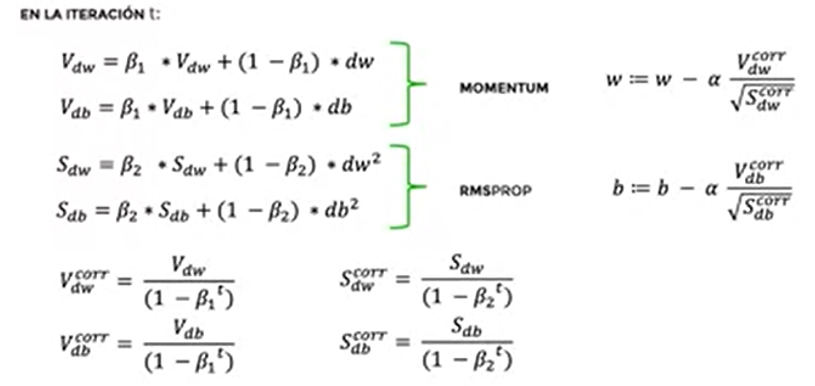

Imagen sacada de [Coursera](https://es.coursera.org/lecture/optimizacin-de-redes-neuronales-profundas/rmsprop-adam-FzzL3)

`Sparse Categorical Cross Entropy` es una función de pérdida para modelos de clasificación de clases múltiples donde a la etiqueta de salida se le asigna un valor entero. La función de pérdida se utiliza para calcular la cantidad que el modelo debe tratar de minimizar durante el proceso de entrenamiento. Una red entrenada será aquella que sea capaz de minimizar el loss score, el valor que determina la loss function. 

Para ello utiliza la siguiente fórmula la cual calcula la pérdida de entropía cruzada entre las etiquetas y las predicciones del modelo.


$L_{_i}=- \sum_{j} y_{i,j}*log(y_{i,j})$



#### Implementación en la red:

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data/255.0
x_val = train_data[:12000]
train_data_p = train_data[12000:]

y_val = train_labels[:12000]
train_labels_p = train_labels[12000:]
# Arquitectura de la red
modelo9 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(10, activation="sigmoid"),
                              tf.keras.layers.Dense(10, activation="softmax")
])


# Definimos Optimizador, Función de Perdida y Metrica:
modelo9.compile(optimizer = "adam",
               loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics = ['accuracy'])
modelo9.summary()

In [ ]:
# Entrenamos el modelo
history9 = modelo9.fit(train_data_p,
                     train_labels_p,
                     epochs = 5,
                     validation_data = (x_val, y_val))

Para analizar el rendimiento del modelo 3 con los nuevos parámetros graficamos sus funciones de pérdida y precisión y las comparamos con el modelo 3 definido anteriormente.

In [ ]:
#Modelo 9
#Loss
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']
#Accuracy
acc9 = history9.history['accuracy']
val_acc9 = history9.history['val_accuracy']
epochs = range(1, len(loss9) + 1)

In [ ]:
size = (10,6)
plt.subplot(121)
plt.plot(epochs, loss9, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss9, 'b', label='Pérdida de Validación')
plt.title('Modelo 3 con nuevos argumentos')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.subplot(122)
plt.plot(epochs, loss3, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss3, 'b', label='Pérdida de Validación')
plt.title('Modelo 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.suptitle('Pérdidas de entreno y validación')


plt.show()

Observamos que el uso de los nuevos parámetros ha mejorado muy considerablemente el rendimiento del modelo 3 y es que podemos ver como nuestro primer modelo a parte de tener una pérdida bastante elevada producía overfitting a partir de la 4 iteración y sin embargo, este nuevo modelo a parte de suplir este problema consigue adaptarse bastante bien a los datos de validación consiguiendo unos resultados muy similares a los obtenidos con los datos de entrenamiento. 

En definitiva, este nuevo modelo 3 esta produciendo una menor pérdida que el anterior modelo 3 tanto en los datos de entrenamiento como en los datos de validación y además esta siendo capaz de generalizar mejor nueva información.

In [ ]:
plt.clf()   # Limpiamos el gráfico

size = (10,6)
plt.subplot(121)
plt.plot(epochs, acc9, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc9, 'b', label='Precisión de Validación')
plt.title('Modelo 3 con nuevos argumentos')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.subplot(122)
plt.plot(epochs, acc3, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc3, 'b', label='Precisión de Validación')
plt.title('Modelo 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = size
plt.suptitle('Pérdidas de entreno y validación')


plt.show()

En cuanto a la precisión volvemos a observar como la precisión obtenida por el nuevo modelo 3 vuelve a ser bastante superior a la obtenida por el anterior modelo. 

Por tanto, podemos concluir que el uso del  optimizador `adam` y de la nueva función de pérdida `sparse categorical cross entropy` han beneficiado considerablemente a la optimización del modelo.

##Conclusiones

En primer lugar definimos los valores mediante los cuales vamos a comparar los modelos. Estos son:
*  `Loss`: Se define la pérdida como la distancia entre las etiquetas y la predecida por el modelo. Cuanto mayor sea este valor, mayores serán los errores cometidos en los datos.

* `Accuracy`: La precisión muestra en forma de porcentaje como de bien responde tu modelo frente a los datos introducidos, es decir, mide el número de clases mal etiquetadas en un problema.

En las siguientes gráficas vamos a comparar los indicadores anteriores frente a los 8 modelos propuestos.

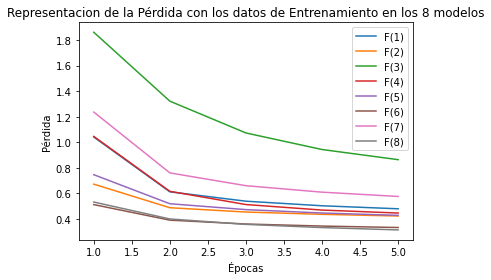

In [ ]:
plt.plot(epochs,loss1,epochs,loss2,epochs,loss3,epochs,loss4,epochs,loss5,epochs,loss6,epochs,loss7,epochs,loss8)

plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='upper right')
plt.title('Representacion de la Pérdida con los datos de Entrenamiento en los 8 modelos')
plt.rcParams["figure.figsize"] = (12,8)

plt.show()

De la gráfica anterior deducimos que tanto un número alto de neuronas en la 1º capa como el optimizador rmsprop proporcionan los mejores resultados minimizando la pérdida. La combinación sgd-relu con 512 neuronas en la 1º capa proporciona unos valores muy similares a los anteriores descritos. Por contra, la combinación sigmoid-sgd produce el peor rendimiento con independencia del número de neuronas en la 1º capa.

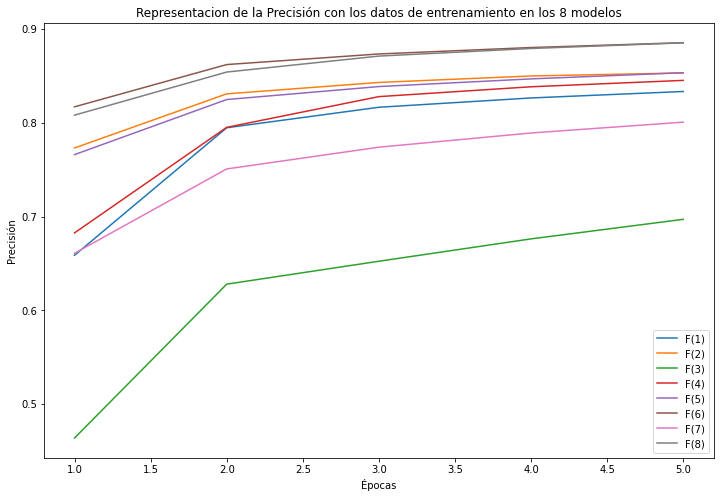

In [ ]:
plt.plot(epochs,acc1,epochs,acc2,epochs,acc3,epochs,acc4,epochs,acc5,epochs,acc6,epochs,acc7,epochs,acc8)

plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='lower right')
plt.title('Representacion de la Precisión con los datos de entrenamiento en los 8 modelos')
plt.rcParams["figure.figsize"] = (12,8)

plt.show()

El análisis de la gráfica de accuracy con los datos de entrenamiento proporciona una indicación muy similar a la gráfica de pérdidas. Los modelos 6, 8 y 5 son los que producen mayor precisión por lo que se deduce que un mayor número de neuronas en la 1º capa junto con el optimizdor rmsprop o la combinación sgd - relu son las que producen una mayor precisión en el modelo con datos de entrenamiento. En el lado de menos precisión están los modelos 3 y 7 que aplican la combinación sigmoid - sgd con independencia del número de neuronas.

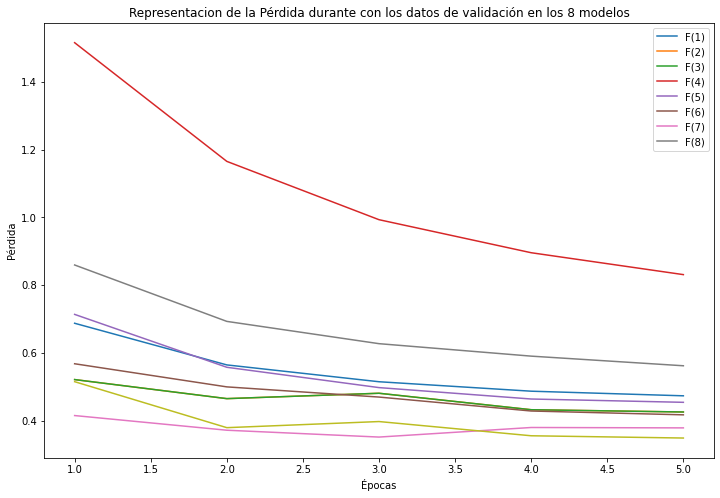

In [ ]:
plt.plot(epochs,val_loss1, epochs,val_loss2, epochs,val_loss2, epochs,val_loss3, epochs,val_loss4, epochs,val_loss5, epochs,val_loss6, epochs,val_loss7, epochs,val_loss8)

plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='upper right')
plt.title('Representacion de la Pérdida durante con los datos de validación en los 8 modelos')
plt.rcParams["figure.figsize"] = (12,8)

plt.show()

En cuanto a los datos de validación y el indicador loss la combinación relu - rmsprop es la que produce mejores resultados y la de sigmoid - rmsprop los peores. Cabe destacar que en estas gráficas se muestra que la precisión no varía tanto por el número de neuronas en la 1º capa, sino que tienen más peso la combinación de los otros 2 factores en el siguiente orden: 

relu - rmsprop > sigmoid - sgd > relu - sgd > sigmoid - rmsprop.

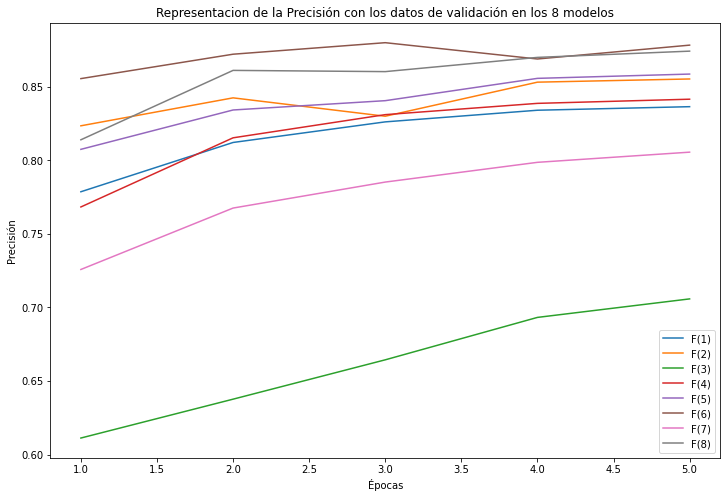

In [ ]:
plt.plot(epochs,val_acc1,epochs,val_acc2,epochs,val_acc3,epochs,val_acc4,epochs,val_acc5,epochs,val_acc6,epochs,val_acc7,epochs,val_acc8)

plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='lower right')
plt.title('Representacion de la Precisión con los datos de validación en los 8 modelos')
plt.rcParams["figure.figsize"] = (12,8)

plt.show()

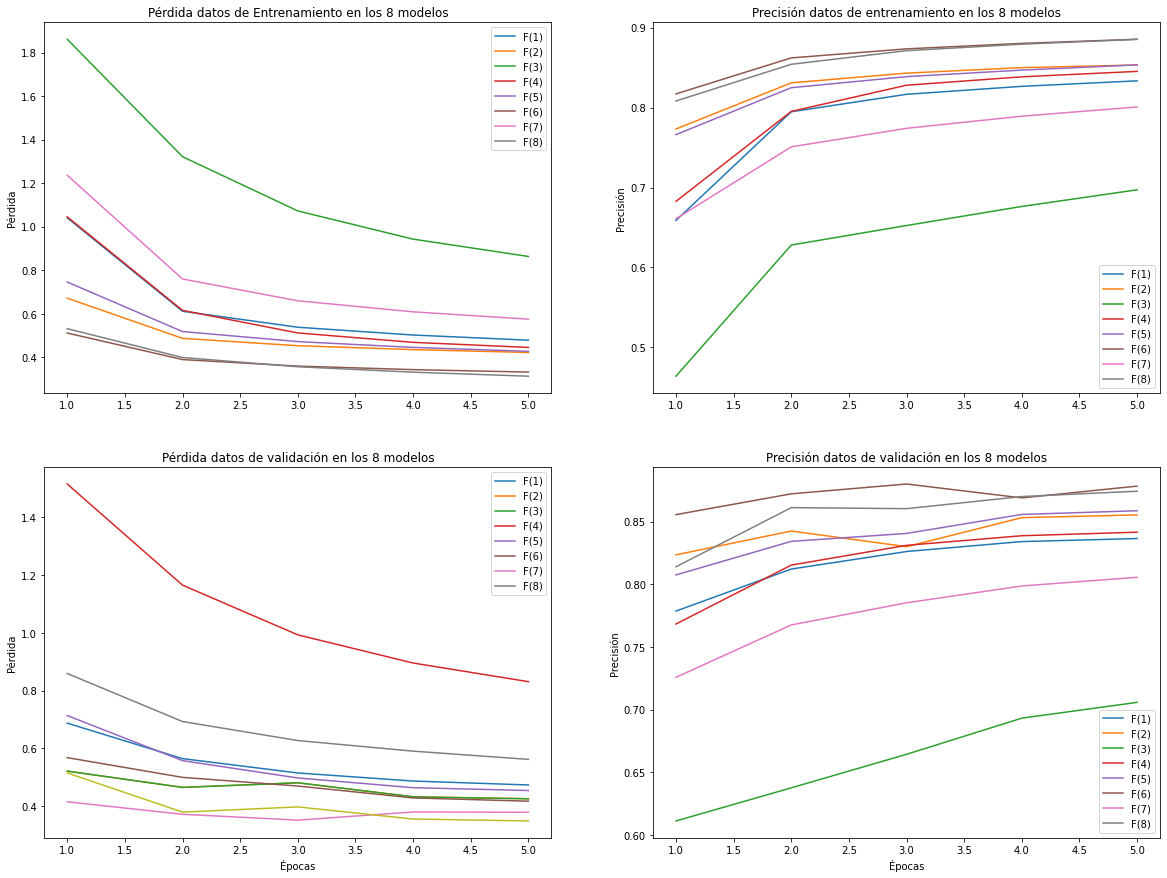

In [ ]:
size = (15,10) #ramaño de las gráficas
plt.subplot(221)
plt.plot(epochs,loss1,epochs,loss2,epochs,loss3,epochs,loss4,epochs,loss5,epochs,loss6,epochs,loss7,epochs,loss8)

plt.ylabel('Pérdida')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='upper right')
plt.title('Pérdida datos de Entrenamiento en los 8 modelos')
plt.rcParams["figure.figsize"] = size

plt.subplot(222)
plt.plot(epochs,acc1,epochs,acc2,epochs,acc3,epochs,acc4,epochs,acc5,epochs,acc6,epochs,acc7,epochs,acc8)

plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='lower right')
plt.title('Precisión datos de entrenamiento en los 8 modelos')
plt.rcParams["figure.figsize"] = size

plt.subplot(223)
plt.plot(epochs,val_loss1, epochs,val_loss2, epochs,val_loss2, epochs,val_loss3, epochs,val_loss4, epochs,val_loss5, epochs,val_loss6, epochs,val_loss7, epochs,val_loss8)

plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='upper right')
plt.title('Pérdida datos de validación en los 8 modelos')
plt.rcParams["figure.figsize"] = size

plt.subplot(224)
plt.plot(epochs,val_acc1,epochs,val_acc2,epochs,val_acc3,epochs,val_acc4,epochs,val_acc5,epochs,val_acc6,epochs,val_acc7,epochs,val_acc8)

plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(('F(1)', 'F(2)','F(3)','F(4)','F(5)','F(6)','F(7)','F(8)'), prop = {'size': 10}, loc='lower right')
plt.title('Precisión datos de validación en los 8 modelos')
plt.rcParams["figure.figsize"] = size


En cuanto a la precisión de los datos de validación vuelve a tener más peso el número de neuronas y se observa un mejor comportamiento del optimizador rmsprop frente al sgd.

Overfitting:

Para observar si se produce el fenómeno de overfitting en los modelos utilizamos la función de pérdida con los datos de entrenamiento frente a la de validación.

In [ ]:
size = (20,16) #ramaño de las gráficas
plt.subplot(441)
plt.plot(epochs, loss1, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss1, 'b', label='Pérdida de la validación')
plt.title('Modelo 1')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.legend()
plt.subplot(442)
plt.plot(epochs, loss2, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss2, 'b', label='Pérdida de la validación')
plt.title('Modelo 2')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(443)
plt.plot(epochs, loss3, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss3, 'b', label='Pérdida de la validación')
plt.title('Modelo 3')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(444)
plt.plot(epochs, loss4, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss4, 'b', label='Pérdida de la validación')
plt.title('Modelo 4')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(445)
plt.plot(epochs, loss5, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss5, 'b', label='Pérdida de la validación')
plt.title('Modelo 5')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(446)
plt.plot(epochs, loss6, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss6, 'b', label='Pérdida de la validación')
plt.title('Modelo 6')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(447)
plt.plot(epochs, loss7, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss7, 'b', label='Pérdida de la validación')
plt.title('Modelo 7')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.subplot(448)
plt.plot(epochs, loss8, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss8, 'b', label='Pérdida de la validación')
plt.title('Modelo 8')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.rcParams["figure.figsize"] = size
plt.suptitle('Pérdidas de entreno y validación')

Tras visualizar las gráficas observamos que en los casos 2, 4 y 6 se produce sobreajuste a partir de la 3º iteración, es decir, estamos sobreajustando los pesos a los datos de entrenamiento y nuestros modelos estan aprendiendo representaciones que solo son específicas para estos datos haciendo que no generalizen para los datos de validación. Esto haría plantearnos el uso de estos modelos si se quisiera incrementar el número de epochs para entrenar a la red.


Matriz de Evaluación de los modelos:

|          | Entrenamiento |          | Validación |          |           |             |
|----------|---------------|----------|------------|----------|-----------|-------------|
| Modelos  | Loss          | Accuracy | Loss       | Accuracy | Resultado | Overfitting |
| 6        | 6             | 7        | 6          | 6        | 25        | Sí          |
| 8        | 7             | 6        | 1          | 7        | 21        | No          |
| 2        | 4             | 4        | 8          | 4        | 20        | Sí          |
| 5        | 5             | 5        | 3          | 5        | 18        | No          |
| 4        | 3             | 3        | 0          | 3        | 9         | Sí          |
| 1        | 2             | 2        | 2          | 2        | 8         | No          |
| 7        | 1             | 1        | 4          | 1        | 7         | No          |
| 3        | 0             | 0        | 5          | 0        | 5         | No          |

Comparando los modelos frente a los indicadores de pérdida y de precisión en las fases de entrenamiento y validación y asignando un peso equivalente a las 4 características se obtiene la tabla anterior en la cual los modelos aparecen ordenados en función de su rendimiento. El modelo que experimenta mejor comportamiento son los modelos 6 y 8 aunque el hecho de que se produzca overfitting en el modelos 6 haría plantearse otros modelos frente a este (el modelo 5) si se quiere entrenar con mayor número de epochs. Aún así, de los modelos 6 y 8 podemos destacar el número de neuronas en la 1º capa, 512,  y el optimizador `rmsprop`. Por contra, los modelos que experimentan peor comportamiento son los modelos 3 y 7 caracterizados ambos por la combinación de la función de activación `sigmoid` con el optimizador`sgd`.

El orden de los modelos con los datos de entrenamiento para loss y accuracy y los de validación para accuracy son idénticos, sin embargo, el orden de los modelos con los datos de validación para loss muestra la importancia de la combinación de la función de activación y el optimizador con independencia del número de neuronas que se apliquen.

###Distribución del trabajo
Para la resolución de la práctica nos hemos repartido los 8 casos del inicio entre los 4 integrantes para así cada uno realizar un par de modelos de redes neuronales. Algunos de los apartados los resolvimos dentro del desarrollo y análisis de cada modelo y otros apartados se tuvieron que hacer aparte.